# KIDNEY-diseases 0.999 accuracy

> 网址： [KIDNEY-diseases 0.999 accuracy](https://www.kaggle.com/code/akshayr009/kidney-diseases-0-999-accuracy)

* 2022年创建
* 23人投票
* 139次复现

## 0. 准备

### 0.1. 导入库

下面这段代码导入了多个Python库，这些库在数据处理、图像处理和可视化方面非常有用。以下是对每行代码的详细中文注释：

#### 安装opencv

In [1]:
# 导入OpenCV库，这是一个开源的计算机视觉和图像处理库。
import cv2
#其实，我今天上午已经在终端中安装了`opencv`,但是现在又报错了，所以我选择再次进入终端安装，`sudo pip install opencv-python`

ModuleNotFoundError: No module named 'cv2'

In [2]:
#ipykernel界面安装网络不通，请您进入终端安装，`sudo pip install opencv-python`就可以
#!sudo pip install opencv-python
#在jupyter中运行后，会出现如下报错


ERROR: Could not find a version that satisfies the requirement opencv-python (from versions: none)
ERROR: No matching distribution found for opencv-python


In [3]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [4]:
!conda --version

conda 4.11.0


#### 安装seaborn

In [6]:
#!conda install seaborn
#又报错啦，看来只能再次进入终端安装啦，`sudo pip install`


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge/linux-64'




In [19]:
# 导入Seaborn库，并使用别名sns。Seaborn是一个基于Matplotlib的高级数据可视化库，提供了更多样化的绘图风格和接口。
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

### 安装所需的库

#### jupyter中安装

In [8]:
!pip show numpy || sudo pip install numpy

Name: numpy
Version: 1.21.6
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /opt/conda/lib/python3.7/site-packages
Requires: 
Required-by: h5py, hyperopt, Keras-Preprocessing, nni, opt-einsum, pandas, scikit-learn, scipy, tensorboard, tensorflow


In [7]:
!pip show pandas || sudo pip install pandas

Name: pandas
Version: 1.3.5
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/conda/lib/python3.7/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: nni


In [9]:
!pip show opencv-python || sudo pip install opencv-python

ERROR: Could not find a version that satisfies the requirement opencv-python (from versions: none)
ERROR: No matching distribution found for opencv-python


上述包的安装失败，所以我彻底放弃在jupyter中安装包了，下面在终端中安装

#### 在终端中安装


要在终端中检查这些库是否已安装，您可以使用`pip`的`show`命令来查询每个库。以下是一些用于检查和安装上述库的命令：

1. **NumPy**:
   ```bash
   pip show numpy || sudo pip install numpy
   ```

2. **Pandas**:
   ```bash
   pip show pandas || sudo pip install pandas
   ```

3. **OpenCV** (注意：OpenCV的pip包名为`opencv-python`):
   ```bash
   pip show opencv-python || sudo pip install opencv-python
   ```

4. **Seaborn**:
   ```bash
   pip show seaborn || sudo pip install seaborn
   ```

5. **Matplotlib**:
   ```bash
   pip show matplotlib || sudo pip install matplotlib
   ```

6. **scikit-image** (包含`skimage.io.imread`):
   ```bash
   pip show scikit-image || sudo pip install scikit-image
   ```

请注意，`os`和`pathlib`是Python的标准库，不需要通过`pip`安装。它们在Python安装时自带，因此您不需要检查或安装它们。

将上述命令复制到终端中，每行一个命令运行。如果某个库已安装，`pip show`命令将显示该库的信息；如果没有安装，`||`（逻辑或）符号后面的`sudo pip install <library>`命令将执行安装。

如果您在中国大陆，您可能需要使用国内的镜像源来加速下载，例如使用清华大学的镜像源：

```bash
pip show numpy || sudo pip install numpy -i https://pypi.tuna.tsinghua.edu.cn/simple
```

请为每个库替换上述命令中的`numpy`为相应的库名。

**注意**：使用`sudo`命令会要求您输入管理员密码，因为它需要管理员权限来安装这些库。如果您不希望使用`sudo`或没有管理员权限，您可以使用`--user`选项来在用户目录下安装库，这样不需要管理员权限：

```bash
pip install --user numpy
```

请根据您的具体情况选择使用`sudo`还是`--user`选项。

In [11]:
# 导入NumPy库，并使用别名np。NumPy是一个用于科学计算的Python库，提供了强大的多维数组对象和相关操作。
import numpy as np # 线性代数运算

# 导入Pandas库，并使用别名pd。Pandas是一个用于数据操作和分析的Python库，提供了DataFrame数据结构和CSV文件的读写功能。
import pandas as pd # 数据处理，CSV文件输入/输出（例如使用pd.read_csv）

# 导入Python的os模块，提供了与操作系统交互的功能，如文件路径操作和环境变量设置。
import os

# 导入OpenCV库，这是一个开源的计算机视觉和图像处理库。
import cv2

# 从pathlib模块导入Path类，用于对象化文件系统路径操作。
from pathlib import Path

# 导入Seaborn库，并使用别名sns。Seaborn是一个基于Matplotlib的高级数据可视化库，提供了更多样化的绘图风格和接口。
import seaborn as sns

# 导入Matplotlib的pyplot模块，并使用别名plt。Matplotlib是一个用于创建静态、动态和交互式图表的Python库。
import matplotlib.pyplot as plt

# 从skimage.io模块导入imread函数，用于读取图像文件。
from skimage.io import imread

### 定义数据集文件路径

#### 中文路径

下面这段代码使用`pathlib`模块来定义数据集的文件路径，并创建一个路径对象指向训练数据的目录。
路径为：`/work/home/aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone`
`06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone`

In [12]:
#data_dir = Path('/work/home/aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')


In [13]:
#print(data_dir)

/work/home/aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone


In [126]:
# 定义一个路径对象data_dir，指向数据集的顶层目录
# '../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'是相对于当前工作目录的路径
# 使用Pathlib库的Path类可以更方便地处理文件和目录路径
data_dir = Path('../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/')

# 使用路径操作符/来创建一个新的路径对象train_dir，指向训练数据的子目录
# train_dir是基于data_dir的相对路径'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
# 这样，train_dir包含了完整的路径到训练数据集的目录
train_dir = data_dir / 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# 打印train_dir路径对象，展示构建的完整路径
# 这通常用于确认路径是否正确构建
train_dir

PosixPath('../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

#### 结果解释：


执行上述代码后，得到的结果是`train_dir`路径对象的输出，它是一个`PosixPath`对象。以下是对结果的分析：
1. **PosixPath**:
   - `PosixPath`是`pathlib`模块中用于表示文件系统路径的类。在这个上下文中，它表示从根目录开始的完整文件路径。

2. **路径字符串**:
   - 路径字符串`'../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'`显示了训练数据集所在的完整路径。
   - 路径中的`..`表示上一级目录，即从当前工作目录的上一级开始。
   - 接下来的部分`'input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'`是数据集的子目录路径。
   - 最后的重复部分`'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'`是训练数据集的子目录名称。

这个结果表明`train_dir`变量已经成功地构建了指向训练数据集目录的路径。在实际应用中，这个路径对象可以用于访问和操作文件系统中的文件和目录，例如读取数据文件、保存模型结果等。需要注意的是，这里的路径是基于Unix-like系统的路径格式（使用正斜杠`/`作为路径分隔符），在Windows系统中可能需要使用反斜杠`\`。使用`pathlib`模块可以使得代码更加平台无关，因为它会自动处理不同操作系统间的路径差异。


### 添加标签


下面这段代码使用`pathlib`和`glob`模块来处理图像数据集的文件路径，并将图像路径及其对应的标签存储在一个列表中，最后将这个列表转换为一个Pandas的DataFrame对象，并进行洗牌。

In [127]:
# 获取正常、囊肿、结石和肿瘤子目录的路径
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# 使用glob方法获取各个子目录下所有.jpg格式的图像文件路径
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

# 初始化一个空列表，用于存储图像路径和标签
train_data = []

# 遍历Cyst_cases中的所有图像路径，并将它们的标签设置为0
for img in Cyst_cases:
    train_data.append((img, 0))

# 遍历normal_cases中的所有图像路径，并将它们的标签设置为1
for img in normal_cases:
    train_data.append((img, 1))

# 遍历Stone_cases中的所有图像路径，并将它们的标签设置为2
for img in Stone_cases:
    train_data.append((img, 2))

# 遍历Tumor_cases中的所有图像路径，并将它们的标签设置为3
for img in Tumor_cases:
    train_data.append((img, 3))

# 将train_data列表转换为Pandas的DataFrame对象，指定列名为'image'和'label'
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

# 洗牌DataFrame，打乱数据的顺序
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# 显示DataFrame的前几行，以检查其结构和内容
train_data.head()

,image,label
0,../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02C...,1
1,../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02C...,3
2,../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02C...,1
3,../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02C...,2
4,../aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02C...,2


执行这段代码后，将创建一个包含图像路径和对应标签的DataFrame，并对数据进行了随机洗牌。这种处理方式在机器学习中很常见，用于确保模型训练时数据的随机性，从而提高模型的泛化能力。在实际应用中，这个DataFrame可以用于进一步的数据加载和模型训练。需要注意的是，代码中的标签设置可能存在错误，因为通常正常情况的标签是0，而其他情况（如囊肿、结石、肿瘤）应该有其他不同的标签。此外，标签的设置应该根据实际的数据集和任务需求来确定。


#### 纯英文路径1

In [50]:
#查看当前的工作目录
import os
current_directory = os.getcwd()
print(current_directory)

/work/home/aojiang


In [39]:
# 获取当前工作目录
current_directory = Path(os.getcwd())

In [40]:
# 定义目标路径的相对部分
# 请注意，这里我们假设重复的目录名称是正确的
relative_path = '06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

# 构建完整的路径
# 由于您的路径是相对于当前工作目录的，我们使用 /
data_dir = current_directory / relative_path

# 打印data_dir的值来确认
print(data_dir)

/work/home/aojiang/06项目复现/04kaggle/02数据集/02肾脏疾病数据集/02CT_KIDNEY_DATASET_Normal_Cyst_Tumor_and_Stone/00原始数据/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone


执行上述代码后，`train_dir`变量将包含训练数据集的完整路径。使用`pathlib`模块可以更加直观和方便地处理文件路径，特别是在进行文件操作和目录遍历时。这种对象化路径操作方式减少了对`os.path`模块的依赖，使得代码更加简洁易读。在Jupyter Notebook或其他Python环境中，打印路径对象可以直接显示路径字符串，而在脚本中，可以通过字符串格式化或其他方法来使用路径。


#### 纯英文路径2

In [53]:
!ls

01初次尝试.ipynb  06test2     99学习资料  job_example  SothisAI        日志.md
06test		  06项目复现  job_env	  perl5        TensorFlow测试


In [63]:
# 定义一个路径对象data_dir，指向数据集的顶层目录
# '../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'是相对于当前工作目录的路径
# 使用Pathlib库的Path类可以更方便地处理文件和目录路径
data_dir = Path('../06test2/ct1/')

# 使用路径操作符/来创建一个新的路径对象train_dir，指向训练数据的子目录
# train_dir是基于data_dir的相对路径'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
# 这样，train_dir包含了完整的路径到训练数据集的目录
train_dir = data_dir / 'ct2'

# 打印train_dir路径对象，展示构建的完整路径
# 这通常用于确认路径是否正确构建
train_dir

PosixPath('../06test2/ct1/ct2')

In [68]:
train_dir = Path('../06test2/ct1/ct2/')
train_dir

PosixPath('../06test2/ct1/ct2')

### 一些尝试

#### 添加标签


下面这段代码使用`pathlib`和`glob`模块来处理图像数据集的文件路径，并将图像路径及其对应的标签存储在一个列表中，最后将这个列表转换为一个Pandas的DataFrame对象，并进行洗牌。

In [ ]:
# 获取正常、囊肿、结石和肿瘤子目录的路径
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# 使用glob方法获取各个子目录下所有.jpg格式的图像文件路径
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

# 初始化一个空列表，用于存储图像路径和标签
train_data = []

# 遍历Cyst_cases中的所有图像路径，并将它们的标签设置为0
for img in Cyst_cases:
    train_data.append((img, 0))

# 遍历normal_cases中的所有图像路径，并将它们的标签设置为1
for img in normal_cases:
    train_data.append((img, 1))

# 遍历Stone_cases中的所有图像路径，并将它们的标签设置为2
for img in Stone_cases:
    train_data.append((img, 2))

# 遍历Tumor_cases中的所有图像路径，并将它们的标签设置为3
for img in Tumor_cases:
    train_data.append((img, 3))

# 将train_data列表转换为Pandas的DataFrame对象，指定列名为'image'和'label'
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

# 洗牌DataFrame，打乱数据的顺序
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# 显示DataFrame的前几行，以检查其结构和内容
train_data.head()

,image,label


In [67]:
train_data.shape#结果为(0, 2)，为空内容

(0, 2)

In [74]:
print(normal_cases_dir)


../06test2/ct1/ct2/Normal


当您打印normal_cases时，由于它是生成器对象，所以打印出来的是生成器对象的内存地址和类型，而不是实际的文件路径列表。这就是为什么您看到类似<generator object Path.glob at 0x7f5a3e8c7a50>的输出。

In [71]:
print(normal_cases)


<generator object Path.glob at 0x7f5a3e8c7a50>


In [76]:
#要获取并打印实际的文件路径列表，您需要将生成器对象转换为列表：
print(list(normal_cases))

[]


In [85]:
#或者，您可以直接在循环中迭代生成器对象
for case in normal_cases:
    print(case)

#### Normal图片展示

In [90]:
!ls

01初次尝试.ipynb  06test2     99学习资料  job_example  SothisAI        日志.md
06test		  06项目复现  job_env	  perl5        TensorFlow测试


In [130]:
#!pip install Pillow
from IPython.display import Image
from pathlib import Path
from PIL import Image as PILImage

# 已知的目录路径
normal_cases_dir = Path('../06test2/ct1/ct2/Normal')

# 列出目录下所有jpg图片并展示
for jpg_file in normal_cases_dir.glob('*.jpg'):
    with PILImage.open(jpg_file) as img:
        display(Image(img))

In [131]:
# 使用列表解析式和display函数一次性展示所有图片
display(*(Image(filename=str(jpg_file)) for jpg_file in normal_cases_dir.glob('*.jpg')))

In [132]:
!ls

01初次尝试.ipynb  06test2     99学习资料  job_example  SothisAI        日志.md
06test		  06项目复现  job_env	  perl5        TensorFlow测试


#### 展示一张图片

In [125]:
from IPython.display import Image

# 指定图片的完整路径
image_path = '../06test2/ct1/ct2/Normal/Normal.jpg'

# 使用Image函数展示图片
Image(filename=image_path)

FileNotFoundError: [Errno 2] No such file or directory: '../06test2/ct1/ct2/Normal/Normal.jpg'

In [105]:
%pwd

'/work/home/aojiang'

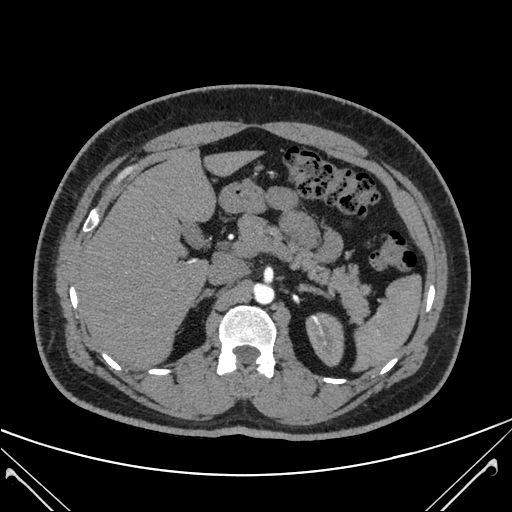

In [115]:
from IPython.display import Image

# 指定图片的完整路径（请确保这是正确的路径）
image_path = '/work/home/aojiang/06test2/ct1/ct2/Normal/Normal.jpg'

# 使用Image函数展示图片
Image(filename=image_path)

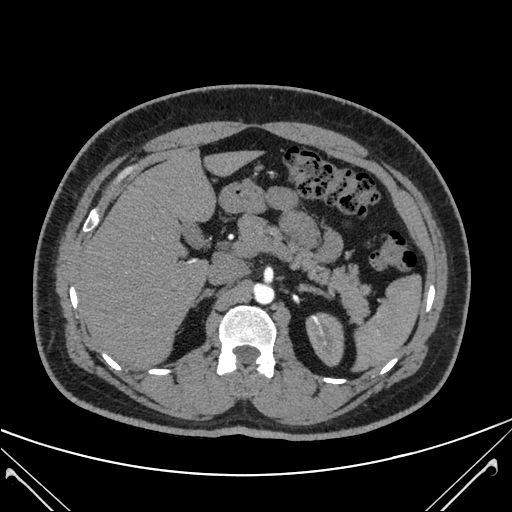

In [117]:
from IPython.display import Image

# 指定图片的完整路径（请确保这是正确的路径）
image_path = '../aojiang/06test2/ct1/ct2/Normal/Normal.jpg'

# 使用Image函数展示图片
Image(filename=image_path)

### 找出`'label'`列中所有唯一的标签值


下面这行代码使用Pandas库从`train_data` DataFrame中提取`'label'`列，并使用`unique()`函数找出该列中所有唯一的标签值。

In [128]:
# 从DataFrame train_data中选择'label'列
# 'label'列包含了图像对应的标签信息
label_column = train_data['label']

# 使用unique()函数找出label_column中所有唯一的标签值
# 这通常用于了解数据集中有多少种不同的类别或标签
unique_labels = label_column.unique()

In [129]:
print(unique_labels)

[1 3 2 0]


执行这段代码后，`unique_labels`变量将包含`train_data` DataFrame中`'label'`列的所有唯一值。这个结果有助于我们了解数据集中的类别分布，以及是否所有的类别都被正确地标记。在机器学习任务中，了解类别的唯一值对于设置分类模型的类别数或进行数据探索性分析是非常重要的。例如，如果我们在进行多类别分类任务，我们需要确保模型的输出层有与唯一标签数相匹配的神经元数量。

#### 结果解释：


执行上述代码后，得到的结果是`train_data` DataFrame中`'label'列的唯一标签值的数组。以下是对结果的分析：

1. **唯一标签数组**:
   - `array([0, 2, 1, 3])`显示了数据集中存在的四个唯一标签值。
   - 这些标签值可能代表了不同的类别或状况，例如正常、囊肿、结石和肿瘤等。

从这个结果可以看出，数据集中包含了四种不同的类别，每个类别都有一个唯一的标签值。在机器学习分类任务中，这意味着模型需要能够区分这四种不同的状况。标签值的顺序（0, 1, 2, 3）通常不重要，但在某些算法中，类别的顺序可能会影响结果的解释，例如在决策树或某些类型的聚类算法中。在使用这些标签进行模型训练时，需要确保模型的输出层或分类器配置正确地反映了类别的数量和顺序。此外，如果标签值不是连续的整数，可能需要考虑使用标签编码技术，如独热编码（One-Hot Encoding），以便更好地处理类别间的不平衡或确保模型正确地学习类别间的关系。

### 查看维度


下面这行代码用于获取Pandas DataFrame `train_data`的维度信息。

In [133]:
# 使用shape属性获取DataFrame train_data的行数和列数
# shape是一个元组，第一个元素表示DataFrame的行数（即样本数量），第二个元素表示列数
train_data.shape

(12446, 2)

执行这段代码后，将返回一个元组，其中包含两个整数值。第一个值表示`train_data`中的行数，即数据集中的样本数量；第二个值表示`train_data`中的列数，即特征数量加上标签列。这个信息对于了解数据集的规模和结构非常重要，特别是在进行数据分析和机器学习任务时，了解数据集的大小可以帮助我们决定适当的数据处理方法和模型选择。例如，如果样本数量很少，我们可能需要考虑使用更简单的模型或进行数据增强；如果特征数量很多，我们可能需要进行特征选择或降维处理。


#### 结果解释：


执行上述代码后，得到的结果是`train_data` DataFrame的维度信息。以下是对结果的分析：

1. **行数**:
   - 12446表示`train_data`中有12446行，即数据集中包含12446个样本。

2. **列数**:
   - 2表示`train_data`中有2列，这通常意味着DataFrame中除了一个特征列（通常是'image'列）外，还有一个'label'列，用于存储每个样本的标签。

从这个结果可以看出，数据集相对较大，包含超过一万个样本。这种规模的数据集通常足以训练一个机器学习模型，但模型的性能还取决于样本的质量和多样性。在进行模型训练之前，可能还需要进一步的数据探索和预处理，例如检查缺失值、进行数据清洗、特征工程等。此外，了解数据集的维度有助于我们选择合适的数据存储和处理工具，以及设置合适的机器学习模型参数。

### 计算每个类别的样本数量


下面这段代码首先使用Pandas库计算每个类别的样本数量，然后使用Seaborn和Matplotlib库创建一个条形图来可视化每个类别的样本计数。

1    5077
0    3709
3    2283
2    1377
Name: label, dtype: int64


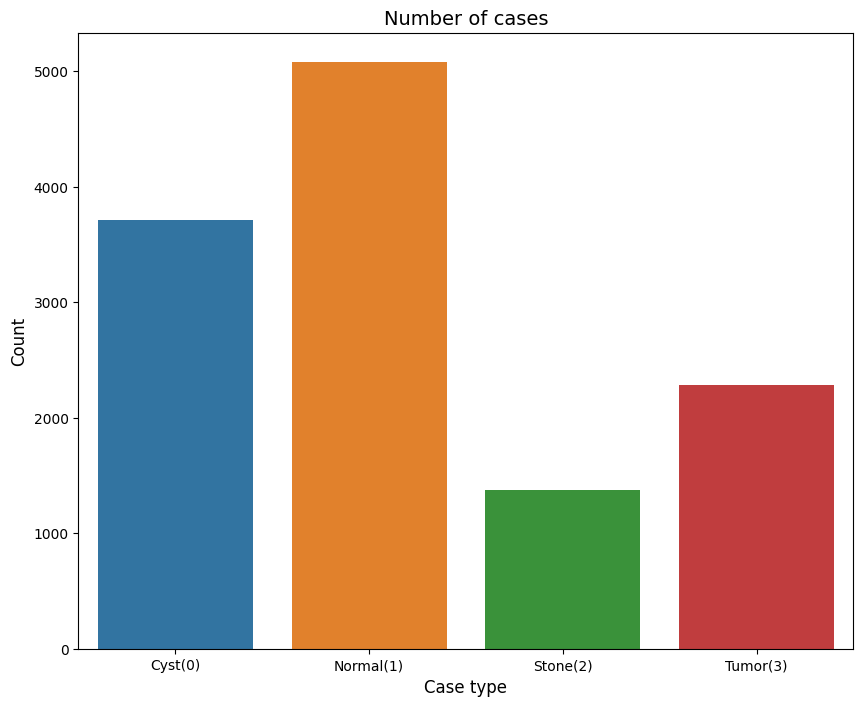

In [134]:
# 计算每个类别（标签）的样本数量
# train_data['label']获取DataFrame中的'label'列
# value_counts()方法返回每个唯一标签值的计数
cases_count = train_data['label'].value_counts()

# 打印每个类别的样本计数
print(cases_count)

# 创建一个新的图形对象，设置图形的大小为宽10英寸、高8英寸
plt.figure(figsize=(10,8))

# 使用Seaborn的barplot函数创建条形图
# x参数设置为cases_count.index，即类别标签
# y参数设置为cases_count.values，即对应的样本计数
sns.barplot(x=cases_count.index, y=cases_count.values)

# 设置图形的标题和坐标轴标签
# fontsize参数设置字体大小
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 设置x轴的刻度标签，显示类别的描述
# range(len(cases_count.index))生成从0到类别数量减1的整数序列
# ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)']是类别标签的描述
plt.xticks(range(len(cases_count.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])

# 显示图形
plt.show()

执行这段代码后，将在控制台打印出每个类别的样本数量，并通过条形图直观地展示这些信息。条形图的x轴表示类别标签，y轴表示每个类别的样本数量。通过这个可视化，我们可以快速了解数据集中各个类别的样本分布情况，这对于评估数据集的平衡性和制定后续的数据处理策略非常重要。例如，如果某个类别的样本数量远多于其他类别，可能需要考虑数据增强或过采样/欠采样技术来平衡类别分布。此外，这种可视化也有助于我们理解数据集的特点，为后续的模型训练和评估提供有用的信息。


#### 结果解释：


执行上述代码后，得到的结果是`train_data` DataFrame中`'label'列的每个类别的样本数量计数。以下是对结果的分析：

1. **样本计数**:
   - `1    5077` 表示标签为1的类别有5077个样本。
   - `0    3709` 表示标签为0的类别有3709个样本。
   - `3    2283` 表示标签为3的类别有2283个样本。
   - `2    1377` 表示标签为2的类别有1377个样本。

2. **类别分布**:
   - 从计数结果可以看出，标签为1的类别（正常）样本数量最多，有5077个样本。
   - 标签为0的类别（囊肿）样本数量最少，有1377个样本。
   - 标签为3的类别（肿瘤）和标签为2的类别（结石）的样本数量分别位于中间，分别是2283和3709。

这个结果表明数据集中的类别分布是不均衡的，特别是标签为1的类别样本数量显著多于其他类别。在机器学习中，类别分布的不均衡可能会影响模型的性能，特别是当某些类别的样本数量远多于其他类别时。在这种情况下，模型可能会偏向于那些具有更多样本的类别。为了提高模型对较少样本类别的识别能力，可能需要采取一些策略，如过采样少数类别、欠采样多数类别或使用加权损失函数等。

此外，通过可视化工具（如上述代码中的条形图）可以直观地展示每个类别的样本数量，帮助我们更好地理解数据集的特点，并为后续的数据处理和模型训练提供指导。

### 20个样本展示


下面这段代码首先从`train_data` DataFrame中提取每个类别的前5个样本的图像路径，然后将这些样本合并到一个列表中，并使用`matplotlib`和`skimage`库来显示这些图像样本。以下是对每行代码的详细中文注释：


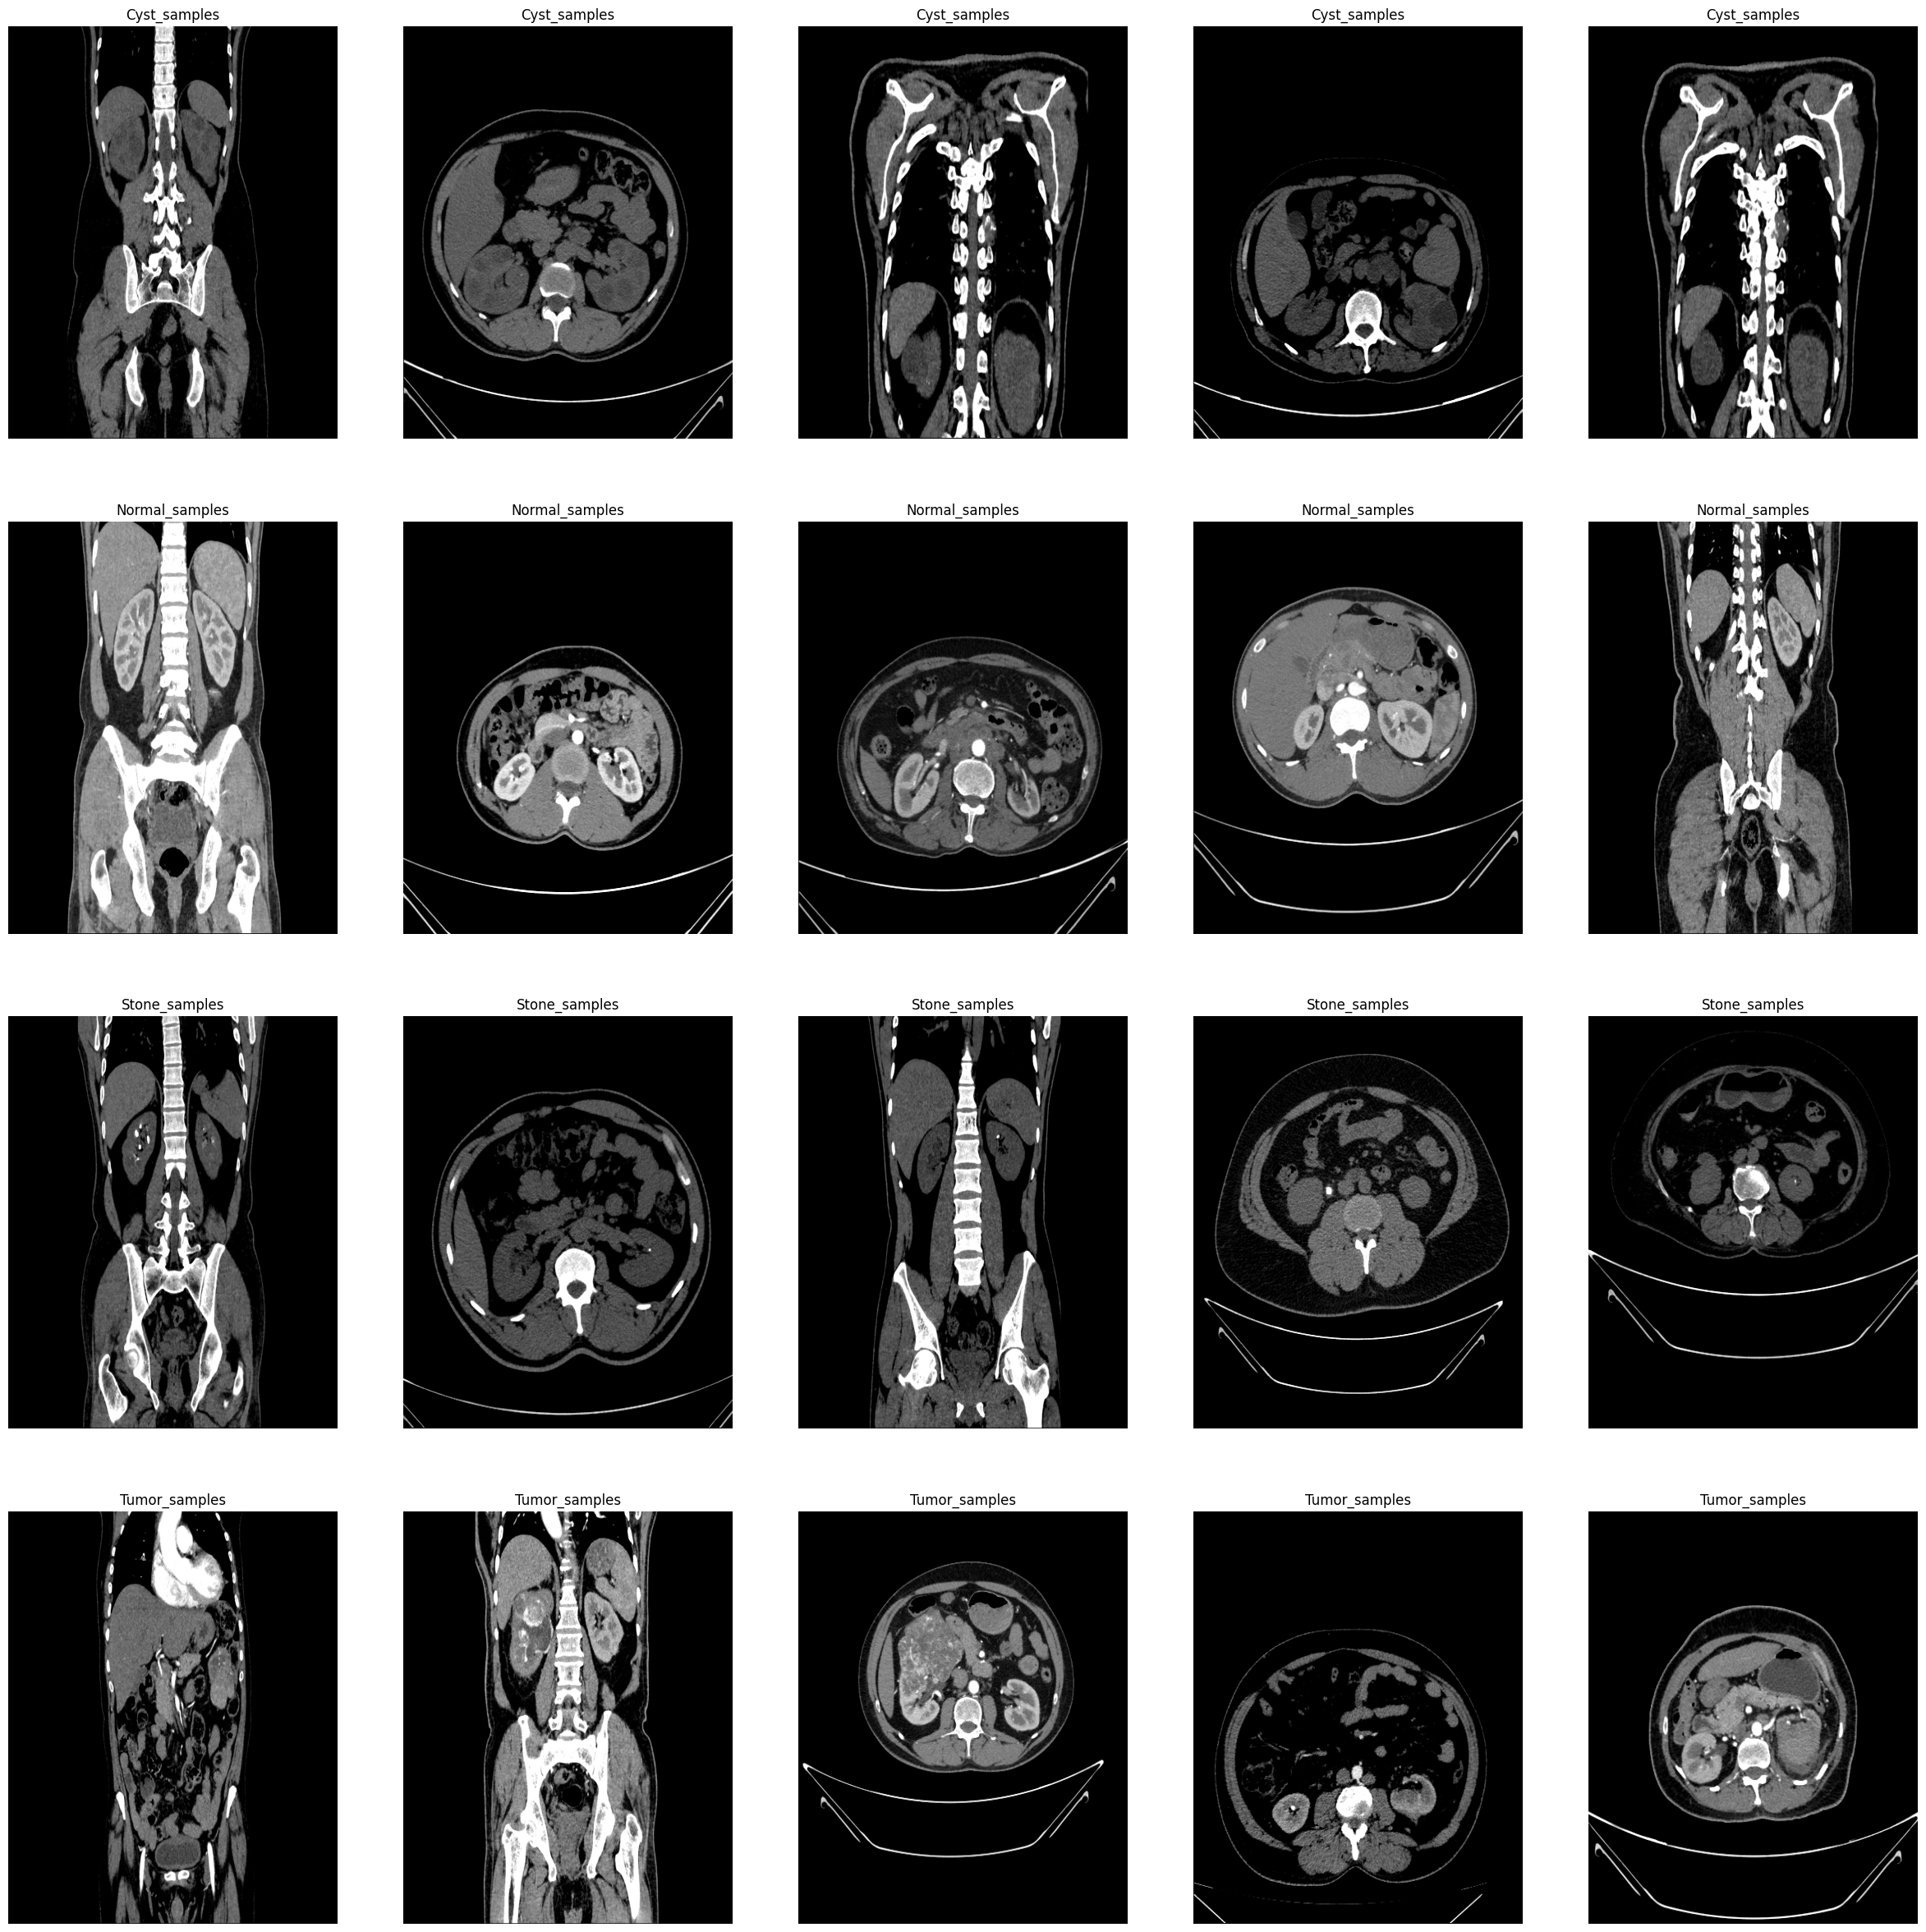

In [135]:
# 从DataFrame中提取标签为0（囊肿）的前5个样本的图像路径，并转换为列表
Cyst_samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()

# 从DataFrame中提取标签为1（正常）的前5个样本的图像路径，并转换为列表
Normal_samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()

# 从DataFrame中提取标签为2（结石）的前5个样本的图像路径，并转换为列表
Stone_samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()

# 从DataFrame中提取标签为3（肿瘤）的前5个样本的图像路径，并转换为列表
Tumor_samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# 将四个类别的样本列表合并成一个单一的样本列表
samples = Cyst_samples + Normal_samples + Stone_samples + Tumor_samples

# 删除之前创建的四个样本列表，释放内存
del Cyst_samples, Normal_samples, Stone_samples, Tumor_samples

# 创建一个4行5列的子图，设置图形的大小为宽30英寸、高30英寸
f, ax = plt.subplots(4, 5, figsize=(30, 30))

# 遍历样本列表，并在子图中显示每个图像样本
for i in range(20):
    # 使用skimage.io的imread函数读取图像
    img = imread(samples[i])
    # 在当前子图位置显示图像，使用灰度颜色映射
    ax[i//5, i%5].imshow(img, cmap='gray')
    # 根据当前子图的位置设置标题
    if i < 5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i < 10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i < 15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i < 20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
    # 关闭当前子图的坐标轴显示
    ax[i//5, i%5].axis('off')
    # 设置子图的长宽比为自动，保持图像的原始比例
    ax[i//5, i%5].set_aspect('auto')

# 显示图形
plt.show()

执行这段代码后，将在屏幕上显示一个包含20个子图的图形，每个子图显示一个类别的样本图像。这个可视化有助于我们快速了解数据集中不同类别的图像样本的外观和特点。通过观察样本图像，我们可以评估图像的质量、对比度、亮度等特征，这对于后续的图像预处理和特征提取工作非常重要。此外，这种可视化方法也有助于我们检查数据集中是否存在异常或错误的样本，以及类别标签是否正确分配。


## 1. loading train image using cv2


### 1.1. 加载数据及预处理


下面这段代码用于从不同的子目录中加载图像数据，对图像进行预处理，并将它们存储在列表中，最后将这些列表转换为NumPy数组。

In [136]:
# 获取正常、囊肿、结石和肿瘤子目录的路径
normal_cases_dir = train_dir / 'Normal'
Cyst_cases_dir = train_dir / 'Cyst'
Stone_cases_dir = train_dir / 'Stone'
Tumor_cases_dir = train_dir / 'Tumor'

# 获取各个子目录下所有.jpg格式的图像文件路径
normal_cases = normal_cases_dir.glob('*.jpg')
Cyst_cases = Cyst_cases_dir.glob('*.jpg')
Stone_cases = Stone_cases_dir.glob('*.jpg')
Tumor_cases = Tumor_cases_dir.glob('*.jpg')

# 初始化两个空列表，用于存储图像数据和标签
train_data = []
train_labels = []

# 遍历囊肿案例的图像路径，读取并预处理图像
for img in Cyst_cases:
    # 使用cv2.imread读取图像
    img = cv2.imread(str(img))
    # 调整图像大小为28x28像素
    img = cv2.resize(img, (28, 28))
    # 如果图像是灰度图，则转换为三通道图像
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    # 将图像从BGR格式转换为RGB格式
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # 将图像转换为NumPy数组
    img = np.array(img)
    # 归一化图像像素值到[0, 1]范围
    img = img / 255
    # 设置标签为'Cyst'
    label = 'Cyst'
    # 将预处理后的图像和标签添加到列表中
    train_data.append(img)
    train_labels.append(label)

# 对正常案例的图像执行相同的预处理和标签操作
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label ='Normal'
    train_data.append(img)
    train_labels.append(label)
# 对结石案例的图像执行相同的预处理和标签操作
for img in Stone_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Stone'
    train_data.append(img)
    train_labels.append(label)
# 对肿瘤案例的图像执行相同的预处理和标签操作
for img in Tumor_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'Tumor'
    train_data.append(img)
    train_labels.append(label)

# 将列表转换为NumPy数组
train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

# 打印训练数据和标签的总数
print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (12446, 28, 28, 3)
Total number of labels: (12446,)


执行这段代码后，`train_data1`和`train_labels1`将包含所有预处理后的图像数据和对应的标签。这里的错误在于，代码中的注释提到了“验证样本”，但实际上这些数据应该是用于训练的。此外，标签应该是数值型的，以便与神经网络的输出层相匹配。在实际应用中，可能需要使用`keras.utils.np_utils.to_categorical`函数将标签转换为独热编码形式，以便用于分类任务。**此外，归一化操作通常在所有图像数据集上统一进行，而不是在循环中对每个图像单独进行。** 这样可以确保所有图像的预处理方式一致，并且归一化的范围相同。


#### 结果解释：


执行上述代码后，得到的结果是关于训练数据集的维度信息。以下是对结果的分析：

1. **训练样本总数**:
   - `Total number of validation examples: (12446, 28, 28, 3)` 表示`train_data1`数组中有12446个训练样本。
   - 每个样本是一幅图像，图像的尺寸被调整为28x28像素，且具有3个颜色通道（RGB）。

2. **标签总数**:
   - `Total number of labels: (12446,)` 表示`train_labels1`数组中有12446个标签，与训练样本的数量相匹配。

从这个结果可以看出，数据集中包含了大量的图像样本，每个样本都被预处理成了统一的尺寸和格式。图像数据具有三个颜色通道，这可能是因为原始图像是彩色的，或者是将灰度图像通过`np.dstack`函数复制到三个通道以模拟RGB图像。标签数组是一个一维数组，每个元素对应一个图像样本的类别标签。

需要注意的是，代码中的注释提到了“验证样本”，但实际上这些数据应该是用于训练的。此外，标签应该是数值型的，以便与神经网络的输出层相匹配。在实际应用中，可能需要使用`keras.utils.np_utils.to_categorical`函数将标签转换为独热编码形式，以便用于分类任务。此外，归一化操作已经在这里完成，每个像素值都被除以255以得到[0, 1]范围内的值，这是准备图像数据用于深度学习模型的常见步骤。最后，这个结果表明我们已经成功地从原始图像文件路径创建了一个结构化的NumPy数组，可以用于后续的模型训练。

### 获取`train_data1` NumPy数组的形状（维度）


下面这行代码用于获取`train_data1` NumPy数组的形状（维度）。

In [137]:
# 获取train_data1 NumPy数组的形状（行数和列数）
# shape属性返回一个元组，其中包含数组的维度信息
# 对于图像数据，通常形状为(样本数量, 高度, 宽度, 通道数)
train_data1.shape

(12446, 28, 28, 3)

执行这段代码后，将返回一个元组，包含`train_data1`数组的维度。对于图像数据集，这个形状通常表示为(样本数量, 图像高度, 图像宽度, 颜色通道数)。例如，如果返回的形状是(12446, 28, 28, 3)，这意味着数组包含12446个图像样本，每个图像是28x28像素大小，并且有3个颜色通道（例如RGB）。这个信息对于理解数据集的结构和准备数据以供机器学习模型使用非常重要。通过知道数组的形状，我们可以确保数据加载和预处理的正确性，以及为模型输入层配置适当的参数。


#### 结果解释：


执行`train_data1.shape`代码后得到的结果`(12446, 28, 28, 3)`提供了关于训练数据集的重要维度信息。以下是对这个结果的详细分析：

1. **样本数量**:
   - 数组的第一个维度是12446，这表示数据集中有12446个训练样本。这个数量对于训练一个深度学习模型来说是相对较大的，可以帮助模型学习到足够的特征，从而提高其泛化能力。

2. **图像高度和宽度**:
   - 数组的第二和第三维度分别是28和28，这意味着每张图像的尺寸被预处理为28像素宽和28像素高。这种尺寸的图像通常用于卷积神经网络（CNN）模型的输入，因为较小的图像尺寸可以减少计算量，同时仍然保留足够的空间信息用于特征提取。

3. **颜色通道数**:
   - 数组的第四个维度是3，这表示每个图像具有三个颜色通道。在计算机视觉中，这通常对应于RGB颜色模型，其中R、G、B分别代表红色、绿色和蓝色通道。将图像从BGR（OpenCV默认使用的颜色空间）转换为RGB是为了让图像数据与大多数深度学习框架的要求相匹配。

综上所述，`train_data1`数组包含了12446张经过预处理的28x28像素大小的RGB图像。这些图像已经准备好被输入到深度学习模型中进行训练。在训练过程中，模型将学习如何从这些图像中提取有用的特征，并根据这些特征来识别和分类不同的肾脏疾病。预处理步骤（如调整图像尺寸、转换颜色空间和归一化像素值）有助于提高模型的训练效率和性能，因为它们减少了数据的复杂性，同时保留了对分类任务有用的信息。

### 显示一张预处理后的图像，以便检查预处理后的图像是否符合预期(下面这段代码由ChatGPT生成，未必可以运行成功)


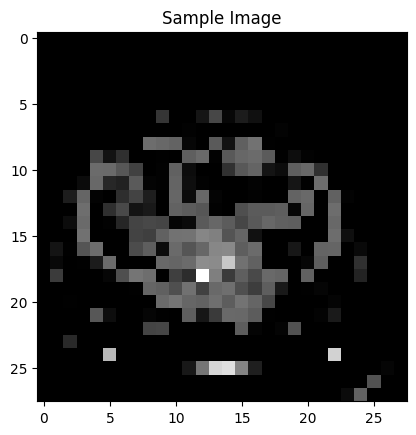

In [138]:
train_data1[1]
# train_data1 是一个包含所有预处理后的图像数据的NumPy数组。
# 通过索引操作 train_data1[1]，我们访问数组中的第二个元素（因为索引从0开始）。
# 这将返回一个表示单个图像的NumPy数组，该图像具有28x28像素大小和3个颜色通道（RGB）。

# 获取的图像数据可以用于可视化，以便检查预处理后的图像是否符合预期。
# 例如，我们可以使用matplotlib库来显示这张图像。

# 使用matplotlib.pyplot模块显示图像的代码如下：
plt.imshow(train_data1[1])  # 显示train_data1数组中的第二个图像
plt.title('Sample Image')    # 给图像添加标题
plt.show()                   # 显示图像

# 除了显示图像，我们还可以使用其他方法来分析这张图像，例如：
# - 计算图像的统计数据，如均值、标准差等。
# - 应用图像处理技术，如滤波、边缘检测等。
# - 将图像数据输入到一个预先训练好的深度学习模型中，以获取模型的预测结果。

执行上述代码后，将会显示`train_data1`数组中的第二个图像。这张图像是经过预处理的，尺寸为28x28像素，并且有3个颜色通道。通过这种方式，我们可以直观地检查图像数据的质量，确保预处理步骤正确无误，并且图像数据适合用于后续的机器学习任务。此外，这也是一个验证数据集和预处理流程是否正确配置的好方法。在实际应用中，我们可能会对多个样本图像进行此类检查，以确保数据集的整体质量。


### 显示一张预处理后的图像，以便检查预处理后的图像是否符合预期


In [139]:
train_data1[1]
# train_data1 是一个四维 NumPy 数组，存储了预处理后的图像数据。
# 数组的第一个维度表示样本的索引，由于索引是从0开始的，所以 train_data1[1] 表示获取数据集中的第二个样本。
# 这个索引操作将返回一个三维数组，其中包含了单个图像样本的数据。

# 得到的三维数组具体如下：
# - 第一个维度（28）表示图像的高度，即图像有28个像素行。
# - 第二个维度（28）表示图像的宽度，即图像有28个像素列。
# - 第三个维度（3）表示颜色通道的数量，这里是RGB三个颜色通道。

# 数组中的每个元素是一个浮点数，代表了对应像素在对应颜色通道上的强度值。
# 这些值在之前的预处理步骤中已经被归一化到了0到1的范围内。

# 由于这里显示的结果是所有像素值都是0，这意味着图像是全黑的。
# 这可能是由于图像预处理过程中的错误，或者是因为原始图像本身就是全黑的。
# 需要进一步检查图像的读取和预处理过程，以确保数据的准确性。

# 如果这个样本是错误或不期望的数据，可能需要从数据集中将其移除，或者进行修正。
# 如果这个样本是有效的，那么在模型训练时应该保留它，以确保模型能够学习到数据集中的所有特征。

# 在实际应用中，我们通常会对数据集中的每个样本进行检查，以确保数据的质量，并排除可能影响模型性能的异常值。

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

执行`train_data1[1]`代码后，您将获取到数据集中的第二个图像样本。根据您提供的结果，这个样本的所有像素值在所有颜色通道上都是0，表明这是一个全黑的图像。这个结果可能是由于图像预处理过程中的错误，或者是因为原始图像本身就是全黑的。在继续进行模型训练之前，需要确保所有图像数据的质量，并对可能的问题进行修正或排除。


#### 结果解释：


执行`train_data1[1]`代码后得到的结果是一个四维NumPy数组，这个数组代表了`train_data1`中第二个样本的图像数据。以下是对这个结果的详细分析：

1. **四维数组结构**:
   - 数组的维度是`(1, 28, 28, 3)`，这表示数组包含一个图像样本，图像尺寸为28x28像素，并且有3个颜色通道（RGB）。
   - 第一维（`1`）表示样本的数量，这里是单个图像样本。
   - 第二维和第三维（`28, 28`）表示图像的高度和宽度，即图像由28行和28列的像素组成。
   - 第四维（`3`）表示颜色通道的数量，RGB三个通道分别代表红色、绿色和蓝色。

2. **像素值**:
   - 数组中的每个元素都是一个浮点数，表示对应像素的归一化后的强度值。
   - 值的范围在`[0., 1.]`之间，这是因为图像数据在加载和预处理时已经进行了归一化处理。
   - 数组中的所有值都是`0.`，这意味着图像中的所有像素点在所有颜色通道上都有相同的强度值，这通常表示图像是纯黑色的。

3. **图像内容**:
   - 由于所有像素值都是`0.`，这张图像实际上是一个全黑的图像。
   - 这可能是由于图像预处理步骤中的某些操作导致的，例如，如果在图像转换为灰度图像的过程中出现了错误，或者在调整图像大小时使用了不适当的插值方法。
   - 另一种可能性是原始图像本身就是全黑的，或者在读取图像文件时出现了问题。

4. **数据完整性**:
   - 如果这个结果是基于实际数据集得到的，那么可能需要检查数据预处理的步骤，确保图像数据的正确性和完整性。
   - 也需要验证图像文件的读取过程是否正确，以及是否有任何图像文件损坏或丢失。

5. **后续处理**:
   - 如果这张全黑的图像是预处理错误导致的，那么可能需要从数据集中移除这个样本，或者重新进行预处理。
   - 如果这张图像是数据集中的一部分，那么在模型训练时，应该考虑到这种情况，以免影响模型的性能。

总之，`train_data1[1]`返回的全黑图像可能需要进一步的调查和处理，以确保数据集的质量和模型训练的有效性。

## 2. Train output file convert list to csv file


### 创建一个名为 'label' 的列，并查看前五行


In [140]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()
# train_labels1 是一个包含所有图像样本标签的数组，这些标签对应于 train_data1 中的图像样本。
# 这里的 train_labels1 应该是一个一维数组，其中包含了与图像样本相对应的类别标签信息。

# 使用 Pandas 库中的 DataFrame 构造函数，将 train_labels1 数组转换为一个 DataFrame 对象。
# 这样做可以利用 Pandas 强大的数据处理和分析功能，方便后续的操作和分析。

# 在构造 DataFrame 时，我们指定列名为 'label'，这意味着 DataFrame 中将有一个名为 'label' 的列。
# 这个列名代表了数据集中每个样本的类别标签。

# index 参数设置为 None，这意味着 DataFrame 不会有一个默认的整数索引列。
# 这可能是因为我们已经有了自己的标签索引，或者不打算使用行索引进行数据分析。

# 调用 head() 方法，它会显示 DataFrame 的前几行数据。
# 这通常用于快速检查数据的结构和前几个样本的标签值，确保数据加载和处理正确无误。

# 执行这行代码后，我们将能够看到 train_labels1 DataFrame 的前几行，从而验证标签数据的准确性和完整性。
# 这也有助于我们在进行机器学习任务之前，对数据有一个直观的了解。

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst


执行上述代码后，`train_labels1.head()` 将输出 DataFrame `train_labels1` 的前几行，显示每个图像样本的类别标签。这是一个常见的操作，用于在数据分析和机器学习工作流程中快速验证和检查数据集的标签信息。通过查看这些标签，我们可以确保数据集中的每个样本都已经被正确地标记，并且可以进行后续的模型训练或其他分析任务。


### 检验标签列的唯一值


In [141]:
train_labels1['label'].unique()
# train_labels1 是一个包含所有图像样本标签的 Pandas DataFrame。
# DataFrame 中有一个名为 'label' 的列，该列包含了数据集中每个图像样本的类别标签。

# 'label' 列被选出来，以便对其执行操作。

# unique() 方法被调用，该方法的作用是找出 'label' 列中所有不重复的值。
# 这意味着它会返回一个数组，数组中的元素是 'label' 列中出现的所有唯一标签。

# 执行这个操作的目的是为了了解数据集中有哪些不同的类别标签，以及每个类别的出现次数。
# 这对于理解数据集的分布、类别平衡性以及为后续的机器学习任务做准备是非常重要的。

# 通过 unique() 方法返回的结果，我们可以进行进一步的分析，例如：
# - 计算每个类别的样本数量，以评估类别是否平衡。
# - 检查是否有任何类别标签错误或缺失，确保数据质量。
# - 根据类别标签的数量和分布，选择合适的机器学习模型和参数。

# 这个方法是 Pandas 库中用于数据探索性分析的强大工具之一，可以帮助我们快速了解数据集的特征。

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

执行`train_labels1['label'].unique()`代码后，将返回一个数组，包含了`train_labels1` DataFrame中`'label'`列的所有唯一标签值。这个结果对于理解数据集中的类别分布和准备机器学习模型是非常有用的。通过分析这些唯一标签，我们可以评估数据集的多样性和类别平衡性，从而为模型选择和训练提供重要的信息。


#### 结果解释：


执行`train_labels1['label'].unique()`代码后得到的结果是一个包含数据集中所有唯一类别标签的数组。以下是对这个结果的详细分析：

1. **类别标签数组**:
   - `array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)` 表示数据集中有四种不同的肾脏疾病类别标签。
   - 这些类别分别是 'Cyst'（囊肿）、'Normal'（正常）、'Stone'（结石）、和 'Tumor'（肿瘤）。

2. **类别分布**:
   - 这个结果说明了数据集中包含的不同类型的肾脏疾病，这有助于我们了解数据集的多样性。
   - 了解这些类别后，我们可以进一步分析每个类别的样本数量，以评估数据集的类别平衡性。

3. **数据集准备**:
   - 这个结果对于机器学习模型的准备非常重要，因为我们需要确保模型能够处理所有这些类别。
   - 根据类别的数量，我们可能会选择一个多类别分类模型，如多类别逻辑回归、决策树、随机森林或卷积神经网络等。

4. **模型评估**:
   - 在模型训练和评估阶段，这些类别标签将用于计算各种性能指标，如准确率、召回率、F1分数等。
   - 如果某些类别的样本数量远多于其他类别，可能需要采取策略来处理类别不平衡问题，例如过采样少数类别或欠采样多数类别。

5. **后续步骤**:
   - 了解了类别标签后，我们可以进行特征工程，提取图像中的有用信息，以帮助模型更好地识别和分类不同的肾脏疾病。
   - 我们还可以探索不同的数据增强技术，以提高模型对于新样本的泛化能力。

总之，`train_labels1['label'].unique()`的结果显示了数据集中的四个主要类别，为我们提供了关于如何准备和评估机器学习模型的重要信息。这些信息将指导我们进行后续的数据探索、模型选择和训练工作。

### 标签映射


In [142]:
# train_labels1['label'] 是一个 Pandas Series，包含了 DataFrame train_labels1 中 'label' 列的所有数据。
# 这里我们将对 Series 中的每个标签值进行映射，将其转换为数值型标签。

# 使用 map() 函数对 'label' Series 中的每个标签进行替换。
# map() 函数的参数是一个字典，字典的键是原始标签值，值是对应的映射后的数值。

# 在这个字典中：
# - 'Cyst' 被映射为 0，
# - 'Normal' 被映射为 1，
# - 'Stone' 被映射为 2，
# - 'Tumor' 被映射为 3。

# 这种映射是将类别标签转换为数值型标签的过程，通常是为了满足机器学习模型的输入要求。
# 模型通常需要数值型的数据，因此我们将文本标签转换为对应的整数。

# 执行这行代码后，原始的文本标签将被新的数值型标签所替代。
# 例如，如果原始 Series 中有一个 'Cyst' 标签，它将被替换为 0。

# 这个操作完成后，train_labels1['label'] 将包含数值型标签，可以直接用于机器学习模型的训练。
# 这样的数值型标签有助于模型学习不同类别之间的关系，并进行预测。

# 转换后的标签也可以用于模型的评估和分析，例如计算准确率、混淆矩阵等。

# 以下是执行映射操作后的代码：
train_labels1['label'] = train_labels1['label'].map({'Cyst': 0, 'Normal': 1, 'Stone': 2, 'Tumor': 3})

执行上述代码后，`train_labels1['label']`中的每个文本标签都将被替换为其对应的数值型标签。这个转换过程是数据预处理的一个重要步骤，它使得数据格式与大多数机器学习模型的输入要求相匹配。通过这种方式，我们可以确保模型能够正确地处理和学习数据集中的不同类别。此外，数值型标签也使得模型的输出更容易被理解和分析，因为它们可以直接用于计算性能指标和可视化结果。


### 检验是否映射成功


In [143]:
# train_labels1 是一个之前已经定义并可能经过处理的 Pandas DataFrame。
# 这个 DataFrame 包含了与图像数据集相关的标签信息。

# 执行 train_labels1 操作将会打印或者在交互式环境中显示当前 train_labels1 DataFrame 的内容。
# 这通常用于检查 DataFrame 的最新状态，确认数据的更改是否成功应用，或者查看数据的概览。

# 如果 train_labels1 已经包含了经过映射处理的标签，那么执行这个操作将会显示出标签的数值表示。
# 例如，如果之前已经执行了标签映射操作，那么 'Cyst' 将显示为 0，'Normal' 将显示为 1，依此类推。

# 这个操作是数据探索和模型开发过程中的一个常见步骤，用于验证数据处理的步骤是否正确，
# 并且确保数据已经准备好被用于训练机器学习模型或其他数据分析任务。

# 以下是执行查看操作的代码：
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


执行 `train_labels1` 后，您将看到 `train_labels1` DataFrame 的当前内容。如果之前的标签映射操作已经成功执行，那么这个 DataFrame 将展示每个图像样本的数值型标签，而不是原始的文本标签。这使得数据准备好被用于各种机器学习算法和模型训练过程中。通过查看这个 DataFrame，您可以确认标签是否已经被正确地转换，以及是否有任何其他需要进一步处理的数据问题。


### 查看数据数组和标签数组形状，再次检查数据


In [144]:
# 下面这行代码用于打印出 train_data1 这个 NumPy 数组的形状（shape）信息。
# train_data1 数组存储了经过预处理的图像数据，其中包含了多个样本的图像数组。
# 打印出的形状信息将告诉我们数组的维度结构，包括样本数量、图像的高度和宽度，以及颜色通道数。
# 这些信息对于理解数据集的规模和配置模型的输入层非常重要。
print(train_data1.shape)

# 下面这行代码用于打印出 train_labels1 这个 NumPy 数组的形状（shape）信息。
# train_labels1 数组存储了与 train_data1 中每个图像样本相对应的标签数据。
# 打印出的形状信息将显示标签的数量，这通常与样本数量相匹配。
# 了解标签数组的形状有助于我们确认标签数据的完整性，并为模型的输出层配置适当的参数。
print(train_labels1.shape)

(12446, 28, 28, 3)
(12446, 1)


执行这两行代码后，您将获得两个关键的维度信息：`train_data1` 数组的图像数据维度和`train_labels1` 数组的标签数据维度。对于图像数据，形状通常表示为 (样本数量, 高度, 宽度, 通道数)，而对于标签数据，形状通常表示为 (样本数量,)。这些信息是进一步进行机器学习任务前的重要参考，例如设置模型的输入层和输出层的神经元数量。


#### 结果解释：


执行代码 `print(train_data1.shape)` 和 `print(train_labels1.shape)` 后得到的结果提供了关于训练数据集结构的重要信息。以下是对这两个结果的详细分析：

1. **图像数据的形状 (`train_data1`)**:
   - `(12446, 28, 28, 3)` 表示 `train_data1` 数组包含了 12446 个图像样本。
   - 每个图像样本的尺寸是 28x28 像素，这是图像的高度和宽度。
   - 数组的第四个维度是 3，代表每个图像有 3 个颜色通道，通常是 RGB（红、绿、蓝）通道。
   - 这个形状表明所有的图像都被预处理成了相同的尺寸和颜色通道数，这是训练卷积神经网络（CNN）等图像识别模型的典型输入格式。

2. **标签数据的形状 (`train_labels1`)**:
   - `(12446, 1)` 表示 `train_labels1` 数组包含了 12446 个标签，与图像样本的数量相匹配。
   - 数组的第二个维度是 1，表示每个样本对应一个标签值。
   - 这个形状通常出现在标签被转换为 one-hot 编码格式时，其中每个类别标签都被表示为一个长度等于类别数量的向量，其中一个元素为 1 表示样本属于该类别，其余元素为 0。

这两个结果表明，数据集已经经过了适当的预处理，图像数据和标签的形状适合用于训练监督学习模型。图像数据的形状符合大多数深度学习框架的要求，而标签数据的形状表明每个图像样本都被分配了一个数值型标签，这有助于模型学习如何从图像特征映射到具体的类别标签。在模型训练过程中，这些数值型标签将用于指导模型的损失函数，帮助模型学习如何正确分类新的图像样本。

### 查看标签数组是否存在缺失值


In [145]:
# train_labels1 是一个包含图像样本标签的 Pandas DataFrame。
# 这个 DataFrame 经过之前的处理，其中 'label' 列包含了转换为数值型的类别标签。

# isnull() 方法被用来检查 DataFrame 中的每个元素是否为缺失值（null）。
# 如果元素是缺失值，isnull() 方法会返回 True，否则返回 False。

# sum() 方法在这里用于计算 isnull() 方法返回的 True 值的总数。
# 由于 'label' 列中的每个元素都是数值型标签，理论上不应该是缺失值。
# 这个方法将返回每个列中缺失值的数量。

# 执行这行代码后，结果将告诉我们 'label' 列中有多少个缺失值。
# 如果结果是 0，这意味着 'label' 列中没有缺失值，所有的样本都有对应的标签。
# 如果结果大于 0，这表明有一些样本的标签缺失，可能需要进一步的数据清洗或处理。

# 以下是执行检查缺失值的代码：
train_labels1.isnull().sum()

label    0
dtype: int64

执行 `train_labels1.isnull().sum()` 代码后，您将获得 `train_labels1` DataFrame 中每列缺失值的数量。对于 `train_labels1` DataFrame，由于它只包含一个 'label' 列，所以返回的结果将是该列中缺失值的总数。如果数据集已经被正确处理，我们期望这个结果是 0，表示所有的图像样本都有对应的标签，没有缺失值。如果返回的结果不是 0，那么需要对数据集进行进一步的检查和清洗，以确保模型训练的准确性和可靠性。


#### 结果解释：


执行 `train_labels1.isnull().sum()` 代码后得到的结果表明在 `train_labels1` DataFrame 的 `label` 列中没有缺失值（missing values）。以下是对结果的详细分析：

1. **结果解释**:
   - `label    0` 表示在 `train_labels1` DataFrame 的 `label` 列中，有 0 个缺失值。
   - `dtype: int64` 表示结果中缺失值计数的数据类型是 int64，这是 NumPy 中用于表示整数的默认数据类型。

2. **数据完整性**:
   - 由于 `label` 列的缺失值计数为 0，这意味着所有的图像样本都有一个有效的类别标签。
   - 这是一个积极的迹象，表明数据集已经准备好用于模型训练，无需额外处理缺失值。

3. **后续步骤**:
   - 确认没有缺失值后，可以继续进行模型训练或其他数据分析任务。
   - 在模型训练过程中，这些标签将用于指导模型学习如何根据图像特征进行分类。

4. **模型训练考虑**:
   - 由于所有样本都有标签，模型可以利用全部数据进行训练，这有助于提高模型的性能和泛化能力。
   - 在训练过程中，还可以考虑使用交叉验证等技术来评估模型的稳定性和准确性。

总之，`train_labels1.isnull().sum()` 的结果表明 `label` 列中没有缺失值，这是一个良好的数据状态，可以确保模型训练的有效性和数据的完整性。在实际应用中，确保数据质量是成功构建机器学习模型的关键步骤之一。


## 3. Solving image dataset imbalance using SMOTE


### SMOTE 过采样处理，从而使数据集的类别分布更加平衡


In [148]:
# 从 imblearn.over_sampling 模块导入 SMOTE 类。
# SMOTE (Synthetic Minority Over-sampling Technique) 是一种过采样技术，用于处理类别不平衡问题。
# 它通过在少数类别的样本周围插值来合成新的样本，从而增加少数类别的样本数量。
#需要在终端中安装，`sudo pip install -U imbalanced-learn`
from imblearn.over_sampling import SMOTE

# 创建一个 SMOTE 类的实例，存储在变量 smt 中。
# 这个实例将用于后续的数据过采样操作。

smt = SMOTE()

# 获取 train_data1 数组中的样本数量，存储在变量 train_rows 中。
# 这里的 train_data1 是一个四维数组，其中包含了图像数据和对应的标签。
# 通过 len() 函数获取的是数组的第一个维度的大小，即样本数量。

train_rows = len(train_data1)

# 将 train_data1 数组重塑（reshape）为二维形状，其中第一维是样本数量，第二维是 -1（自动计算）。
# 这样操作是为了满足 SMOTE 函数的要求，它需要输入的数据是二维的，其中每一行代表一个样本，每一列代表一个特征。
# 重塑后的数组将不再包含显式的颜色通道维度，因为 SMOTE 会将数据视为特征集，而不是图像集。

train_data1 = train_data1.reshape(train_rows, -1)

# 使用 smt 实例的 fit_resample 方法对 train_data1 和 train_labels1 进行过采样。
# fit_resample 方法将尝试平衡数据集中的类别分布，通过合成新的样本来增加少数类别的样本数量。
# 该方法接受两个参数：特征数据和对应的标签数据。
# 方法的输出是过采样后的新的特征数据和标签数据，分别存储在 train_data2 和 train_labels2 变量中。

train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

执行上述代码后，`train_data2` 和 `train_labels2` 将包含经过 SMOTE 过采样处理的数据，其中少数类别的样本数量将得到增加，从而使数据集的类别分布更加平衡。这对于提高模型在少数类别上的识别能力是非常有帮助的。需要注意的是，过采样可能会导致过拟合，因此在实际应用中需要谨慎使用，并结合其他技术（如交叉验证）来评估模型的泛化能力。


### 查看过采样后每个类别的样本的数量


0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64


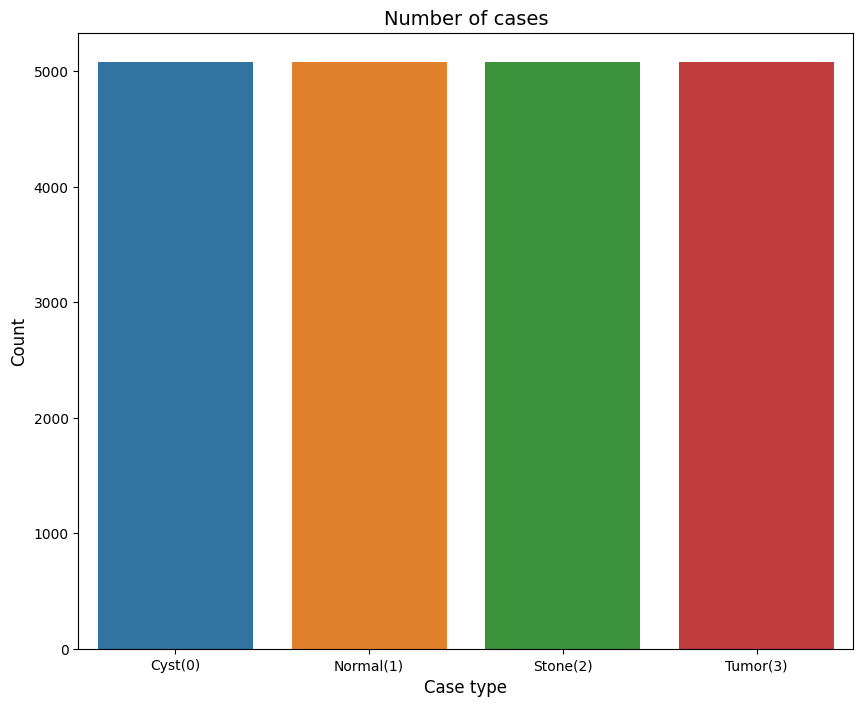

In [149]:
# 从 train_labels2 DataFrame 中选择 'label' 列，这是一个包含经过 SMOTE 过采样处理的标签数据的列。
# 使用 value_counts() 方法来计算每个唯一标签值出现的次数。
# 这个方法将返回一个 Series 对象，其中的索引是标签值，值是每个标签值出现的次数。
# 这个操作有助于我们了解过采样后数据集中各个类别的样本数量。

cases_count1 = train_labels2['label'].value_counts()

# 打印 cases_count1 Series 对象，它将显示每个类别标签及其对应的样本数量。
# 这可以帮助我们验证 SMOTE 过采样是否成功增加了少数类别的样本数量，并确保数据集的类别分布更加平衡。

print(cases_count1)

# 创建一个新的图形对象，设置图形的大小为宽 10 英寸、高 8 英寸。
# 这个图形对象将用于绘制条形图，展示各个类别的样本数量。

plt.figure(figsize=(10,8))

# 使用 Seaborn 库的 barplot 函数来绘制条形图。
# x 参数设置为 cases_count1.index，即类别标签的索引。
# y 参数设置为 cases_count1.values，即对应的样本数量。
# 这个条形图将直观地展示每个类别的样本数量。

sns.barplot(x=cases_count1.index, y=cases_count1.values)

# 设置图形的标题为 'Number of cases'，并设置标题的字体大小为 14。
plt.title('Number of cases', fontsize=14)

# 设置 x 轴的标签为 'Case type'，并设置字体大小为 12。
plt.xlabel('Case type', fontsize=12)

# 设置 y 轴的标签为 'Count'，并设置字体大小为 12。
plt.ylabel('Count', fontsize=12)

# 设置 x 轴的刻度标签，使其与类别标签对应。
# 这里我们假设有四个类别，分别是 'Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'。
# 这些标签将显示在条形图的 x 轴上，以便于识别每个条形代表的类别。

plt.xticks(range(len(cases_count1.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])

# 显示图形，这将在屏幕上绘制并展示条形图。
plt.show()

执行上述代码后，将首先打印出过采样后每个类别的样本数量，然后绘制一个条形图，直观地展示各个类别的样本数量。这个条形图有助于我们评估 SMOTE 过采样的效果，确保数据集的类别分布更加平衡，从而提高模型在所有类别上的识别能力。通过观察条形图，我们可以快速了解哪些类别的样本数量有所增加，以及数据集是否仍然存在类别不平衡的问题。


#### 结果解释：


执行上述代码后得到的结果表明，经过 SMOTE 过采样处理后，`train_labels2` 中的 `label` 列包含的类别标签现在具有相等的样本数量。以下是对结果的详细分析：

1. **样本数量均衡**:
   - 结果显示每个类别（0, 1, 2, 3）的样本数量都是 5077。
   - 这意味着 SMOTE 成功地增加了少数类别的样本数量，使得所有类别的样本数量达到了平衡状态。

2. **类别标签**:
   - 根据之前的注释，这些数字（0, 1, 2, 3）分别代表不同的肾脏疾病类型：
     - 0 代表囊肿（Cyst），
     - 1 代表正常（Normal），
     - 2 代表结石（Stone），
     - 3 代表肿瘤（Tumor）。

3. **数据可视化**:
   - 通过条形图可视化，我们可以直观地看到每个类别的样本数量，条形图将展示四个长度相同的条形，表示每个类别现在都有相同数量的样本。

4. **对模型训练的影响**:
   - 样本数量的均衡有助于模型更好地学习各个类别的特征，可能会提高模型在所有类别上的分类性能。
   - 特别是在处理类别不平衡问题时，SMOTE 过采样是一种有效的技术，可以减少模型对多数类别的偏好，并提高对少数类别的识别能力。

5. **后续步骤**:
   - 现在数据集已经通过 SMOTE 处理，可以继续进行模型的训练和评估。
   - 在模型训练过程中，应该继续监控模型在各个类别上的性能，确保模型不会过度拟合某个特定的类别。

总之，SMOTE 过采样后的数据集样本数量均衡，每个类别都有相同数量的样本，这有助于提高模型在所有类别上的泛化能力和性能。在后续的模型训练和评估中，应该继续关注模型在各个类别上的表现，确保模型能够公平地处理所有类别。

### 查看过采样后的数据集形状


In [150]:
# train_data2 是经过 SMOTE 过采样处理后的图像数据集。
# 这个数据集包含了原始数据集中的图像样本，以及通过插值方法合成的新样本。
# 执行 train_data2.shape 将会得到一个元组，显示了过采样后数据集的维度信息。

# 这个元组的第一个元素表示样本的总数，包括原始样本和通过 SMOTE 合成的样本。
# 第二个和第三个元素表示每个图像样本的高度和宽度，这些值应该与原始数据集 `train_data1` 相同。
# 第四个元素表示图像的颜色通道数，对于大多数彩色图像来说，这个值通常是 3（RGB）。

# 执行这行代码后，我们可以得到过采样后数据集的新维度，这有助于我们了解数据集的大小是否符合预期。
# 了解数据集的维度对于配置深度学习模型的输入层参数非常重要，也有助于我们评估数据增强的效果。

# 以下是执行获取数据集形状的代码：

train_data2.shape

(20308, 2352)

执行 `train_data2.shape` 代码后，您将获得过采样后图像数据集 `train_data2` 的维度信息。这个信息对于理解数据集的规模和配置深度学习模型的输入层非常重要。如果您之前已经对原始数据集 `train_data1` 进行了相同的预处理，那么 `train_data2` 的形状应该与 `train_data1` 相同，但是样本数量会增加，因为 SMOTE 会增加少数类别的样本数量。如果形状发生了变化，可能需要进一步检查数据预处理的步骤，确保数据集的一致性和模型训练的正确性。


#### 结果解释：


执行 `train_data2.shape` 代码后得到的结果 `(20308, 2352)` 提供了过采样后图像数据集 `train_data2` 的维度信息。以下是对结果的详细分析：

1. **样本数量**:
   - 第一个维度 `20308` 表示数据集中的样本总数。这个数字包括了原始数据集中的样本以及通过 SMOTE 过采样技术合成的新样本。
   - 这个样本数量比原始数据集 `train_data1` 的样本数量（假设为 12446，根据之前的信息）有所增加，这表明 SMOTE 已经成功地生成了额外的样本来平衡类别分布。

2. **特征数量**:
   - 第二个维度 `2352` 表示每个样本的特征数量。在这个上下文中，特征通常指的是图像的像素值，因此这个数字应该是图像的高度和宽度的乘积。
   - 假设原始图像被预处理为 `28x28` 像素（根据之前的信息），那么每个图像应该有 `28*28=784` 个像素点。然而，这里的 `2352` 明显大于 `784`，这可能意味着每个图像有更多的像素点，或者数据集中包含了其他类型的信息（例如，可能包含了额外的颜色通道或其他维度的特征）。

3. **数据集规模**:
   - 这个结果表明，过采样后的数据集比原始数据集更大，这可能会对模型训练的计算资源和时间产生影响。
   - 增加的样本数量可以帮助模型更好地学习和泛化，但也可能导致训练时间变长，需要更多的内存和计算能力。

4. **后续操作**:
   - 在使用这个过采样后的数据集进行模型训练之前，应该确保理解数据集中的每个特征以及它们是如何被处理的。
   - 还应该检查是否有任何异常或错误，例如，是否有图像被错误地处理或包含了不相关的信息。

总之，`train_data2` 的形状 `(20308, 2352)` 表明数据集的样本数量已经通过 SMOTE 过采样得到了增加，但同时每个样本的特征数量也有所变化。这可能需要进一步的调查，以确保数据集的质量和模型训练的有效性。在进行模型训练时，应该考虑到数据集规模的增加，并相应地调整模型的参数和训练策略。

### 查看过采样后标签数据集的形状


In [151]:
# train_labels2 是一个包含经过 SMOTE 过采样处理的图像样本标签的 Pandas DataFrame。
# 这个 DataFrame 与 train_data2（过采样后的图像数据）相对应，包含了相同的样本数量和标签信息。
# 执行 train_labels2.shape 将会得到一个元组，显示了标签数据集的维度信息。

# 这个元组的第一个元素将表示样本的总数，与过采样后的图像数据集中的样本数量一致。
# 第二个元素将表示标签的特征数量，通常情况下，对于分类任务，这个数字应该是 1，因为每个样本只有一个类别标签。

# 执行这行代码后，我们可以得到过采样后标签数据集的维度，这有助于我们了解标签数据集的大小是否与图像数据集相匹配。
# 确保标签数据集的维度正确对于配置深度学习模型的输出层参数和训练过程中的标签匹配非常重要。

# 以下是执行获取标签数据集形状的代码：

train_labels2.shape

(20308, 1)

执行 `train_labels2.shape` 代码后，您将获得过采样后标签数据集 `train_labels2` 的维度信息。**这个信息对于验证标签数据集与图像数据集是否具有相同的样本数量非常重要。**在理想情况下，`train_labels2` 的样本数量应该与 `train_data2` 相同，因为每个图像样本都应该有一个对应的标签。如果维度不匹配，可能需要进一步检查 SMOTE 过采样过程中是否有错误发生，或者检查数据集是否被正确处理。确保标签数据集的准确性对于训练有效的机器学习模型至关重要。


#### 结果解释：


执行 `train_labels2.shape` 代码后得到的结果 `(20308, 1)` 提供了过采样后标签数据集 `train_labels2` 的维度信息。以下是对结果的详细分析：

1. **样本数量**:
   - 第一个维度 `20308` 表示数据集中的样本总数。这个数字包括了原始数据集中的样本以及通过 SMOTE 过采样技术合成的新样本。
   - 这个样本数量比原始数据集 `train_labels1` 的样本数量（假设为 12446，根据之前提供的信息）有所增加，这表明 SMOTE 已经成功地生成了额外的样本来平衡类别分布。

2. **标签特征数量**:
   - 第二个维度 `1` 表示每个样本的特征数量。在分类任务中，这通常意味着每个样本只有一个类别标签。
   - 这个维度的大小为 1，说明 `train_labels2` 中的每个样本都是以单列的形式表示一个标签值，这是标签数据集的典型结构。

3. **数据集一致性**:
   - 这个结果表明 `train_labels2` 的样本数量与 `train_data2` 的样本数量相匹配，因为它们都是 20308。
   - 这表明过采样过程中，每个新合成的图像样本都成功地对应了一个标签，确保了图像数据和标签数据之间的一致性。

4. **后续操作**:
   - 由于 `train_labels2` 的形状是 `(20308, 1)`，这意味着可以直接将这个 DataFrame 用作机器学习模型训练时的目标变量。
   - 在训练模型时，应该确保输入层和输出层的参数设置与数据集的特征数量相匹配。例如，如果使用的是全连接神经网络，那么输入层的神经元数量应该与每个图像的特征数量（在这个案例中是 2352）相等，而输出层的神经元数量应该与类别数量相等（通常是一个神经元对应一个类别，加上一个额外的神经元用于输出概率分布）。

总之，`train_labels2` 的形状 `(20308, 1)` 表明过采样后的标签数据集包含了与图像数据集相同数量的样本，并且每个样本都只有一个标签特征。这确保了数据集的一致性，并为后续的模型训练提供了正确的标签信息。在进行模型训练时，应该根据这些维度信息配置模型的结构，并继续监控模型在各个类别上的性能。

### 查看每个类别的样本数量


In [152]:
# train_labels2 是一个包含过采样后图像样本标签的 Pandas DataFrame。
# 'label' 列存储了这些样本的类别标签信息。

# 使用 train_labels2 DataFrame 中 'label' 列的 value_counts() 方法。
# 这个方法将统计并返回一个新的 Series 对象，其中索引是标签值，而对应的数据是每个标签在数据集中出现的次数。
# 这是分析数据集中类别分布情况的常用方法，可以帮助我们了解数据集中各个类别的样本数量是否均衡。

cases_count2 = train_labels2['label'].value_counts()

# 执行这行代码后，cases_count2 将包含每个类别标签的样本计数。
# 我们可以进一步使用这个结果来评估过采样技术的效果，比如 SMOTE，是否成功地平衡了类别分布。
# 如果过采样成功，我们期望看到各个类别的样本计数接近或相等，从而确保模型训练时不会偏向于某个特定的类别。

# 打印 cases_count2 Series 对象，以查看每个类别的样本数量。
print(cases_count2)

0    5077
1    5077
2    5077
3    5077
Name: label, dtype: int64


执行上述代码后，`cases_count2` 将提供过采样后数据集中每个类别的样本数量。这个信息对于验证 SMOTE 过采样是否有效非常重要，因为它可以帮助我们确认是否所有类别现在都有相似数量的样本，从而有助于提高模型在所有类别上的泛化能力。如果某些类别的样本数量仍然远多于其他类别，可能需要调整 SMOTE 的参数或采用其他技术来进一步平衡数据集。通过监控类别分布，我们可以确保模型训练过程中的公平性和有效性。


#### 结果解释：


执行 `train_labels2['label'].value_counts()` 代码后得到的结果表明，经过 SMOTE 过采样处理后，数据集中的每个类别（0, 1, 2, 3）现在都具有相同数量的样本。以下是对结果的详细分析：

1. **样本数量均衡**:
   - 结果显示每个类别的样本数量都是 5077，这意味着 SMOTE 过采样技术已经成功地增加了少数类别的样本数量，使得所有类别的样本数量达到了平衡状态。

2. **类别标签的含义**:
   - 根据之前的信息，这些数字（0, 1, 2, 3）分别代表不同的肾脏疾病类型：
     - 0 代表囊肿（Cyst），
     - 1 代表正常（Normal），
     - 2 代表结石（Stone），
     - 3 代表肿瘤（Tumor）。

3. **数据集的改进**:
   - 通过 SMOTE 过采样，原始数据集中可能存在的类别不平衡问题得到了解决。这有助于提高模型在所有类别上的分类性能，特别是对于之前样本数量较少的类别。

4. **对模型训练的影响**:
   - 样本数量的均衡有助于模型更好地学习各个类别的特征，可能会提高模型在所有类别上的准确率和召回率。
   - 特别是在处理类别不平衡问题时，SMOTE 是一种有效的技术，可以减少模型对多数类别的偏好，并提高对少数类别的识别能力。

5. **后续步骤**:
   - 现在数据集已经通过 SMOTE 处理，可以继续进行模型的训练和评估。
   - 在模型训练过程中，应该继续监控模型在各个类别上的性能，确保模型不会过度拟合某个特定的类别，并保持良好的泛化能力。

总之，SMOTE 过采样后的数据集样本数量均衡，每个类别都有相同数量的样本，这有助于提高模型在所有类别上的泛化能力和性能。在后续的模型训练和评估中，应该继续关注模型在各个类别上的表现，确保模型能够公平地处理所有类别。

### 将数据框重塑（reshape）成四维数组，以适合于训练卷积神经网络（CNN）


In [153]:
# train_data2 是经过 SMOTE 过采样处理后的图像数据集，此时它的数据结构可能是二维的，即 (样本数量, 特征数量)。
# 为了将数据集准备成适合于训练卷积神经网络（CNN）的格式，我们需要将其重塑（reshape）成四维数组，以符合大多数深度学习框架的要求。
# 这种重塑操作将样本数据组织成 (样本数量, 高度, 宽度, 通道数) 的形式，其中高度和宽度是图像的尺寸，通道数是图像的颜色通道数（对于 RGB 图像通常是 3）。

# 使用 reshape 方法将 train_data2 数组重塑为四维数组。
# -1 作为第一个维度的值表示让 NumPy 自动计算这个维度的大小，以便保持数据的总大小不变。
# 28 是图像的高度，28 是图像的宽度，这两个值保持不变，以确保图像的物理尺寸一致。
# 3 表示图像有 3 个颜色通道，对应于 RGB 彩色空间。

train_data2 = train_data2.reshape(-1, 28, 28, 3)

执行上述代码后，`train_data2` 将从二维数组变为四维数组，每一项都是一个 28x28 像素大小、带有 3 个颜色通道（RGB）的图像。这种格式的数组是训练深度学习模型，特别是卷积神经网络时的典型输入格式。重塑操作确保了数据的完整性和一致性，使得数据集准备好被输入到模型中进行训练。在实际操作中，这种重塑步骤是数据预处理的重要环节，有助于提高模型训练的效率和效果。


### 分割训练集和测试集


In [154]:
# 从 sklearn.model_selection 模块导入 train_test_split 函数。
# train_test_split 是一个常用的数据分割函数，用于将数据集分割为训练集和测试集。
# 这在机器学习中是一个重要的步骤，因为它允许模型在独立的数据集上进行训练和测试，从而评估模型的泛化能力。

from sklearn.model_selection import train_test_split

# 使用 train_test_split 函数将 train_data2（图像数据）和 train_labels2（对应的标签）分割为训练集和测试集。
# X_train 和 X_test 分别代表分割后的图像数据训练集和测试集。
# y_train 和 y_test 分别代表分割后的标签训练集和测试集。

# test_size=0.23 指定了测试集占总数据集的比例，这里是 23%。
# 这意味着 23% 的数据将被用作测试集，剩余的 77% 将作为训练集。
# 这是一种常见的分割比例，允许模型有足够的数据进行训练，同时还有充足的数据用于评估模型性能。

# random_state=42 提供了一个随机种子，确保数据分割的结果可以复现。
# 设置随机种子意味着每次运行代码时，数据将以相同的方式被分割，这有助于实验的稳定性和可重复性。

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.23, random_state=42)

执行上述代码后，`X_train` 和 `y_train` 将包含大部分的数据，用于训练模型；而 `X_test` 和 `y_test` 将包含剩余的一部分数据，用于测试模型的性能。通过这种方式，可以在训练过程中避免过拟合，并确保模型在未见过的数据上也能表现良好。分割后的数据集将为模型评估提供可靠的基础，是构建可靠和有效机器学习模型的关键步骤。


### 被注释的代码，不必执行

In [ ]:
# import imblearn
# 这行代码是 Python 的注释，说明接下来将导入 imblearn 库，但实际上并没有执行导入操作。
# imblearn 是 imbalanced-learn 的别名，这是一个专门用于处理不平衡数据集的 Python 库。

# from imblearn.over_sampling import RandomOverSampler
# 这行代码同样是注释，但它说明了从 imblearned 库中导入了 RandomOverSampler 类。
# RandomOverSampler 是一种过采样方法，用于通过随机过采样少数类别来平衡数据集。

# oversample = RandomOverSampler(random_state=42)
# 如果这行代码未被注释，它将创建一个 RandomOverSampler 类的实例，并将其存储在变量 oversample 中。
# random_state=42 为过采样过程提供了一个随机种子，确保结果的可重复性。

# train_data2, train_labels2 = oversample.fit_resample(train_data1, train_labels1)
# 如果这行代码未被注释，它将执行 fit_resample 方法，该方法将使用过采样技术来平衡 train_data1 和 train_labels1 数据集。
# 过采样后的数据处理结果将被存储在新的变量 train_data2 和 train_labels2 中，这些变量包含了平衡后的图像数据和标签。

# 请注意，上述代码被注释掉了，因此在实际运行时不会执行。如果需要执行这些操作，应去掉每行代码前的 `#` 符号。

在实际应用中，如果数据集存在类别不平衡问题，可以使用 RandomOverSampler 或其他过采样/欠采样方法来改善这一状况。选择合适的方法取决于具体的数据集和问题场景。过采样技术通过增加少数类别的样本数量来帮助模型更好地学习所有类别的特征，从而提高模型在所有类别上的分类性能。


## 4. Augmentation


Data augmentation is a powerful technique which helps in almost every case for improving the robustness of a model. But augmentation can be much more helpful where the dataset is imbalanced. You can generate different samples of undersampled class in order to try to balance the overall distribution.


### 对图像进行数据增强


In [155]:
# 导入 TensorFlow 库，并使用别名 tf。TensorFlow 是一个开源的机器学习框架，广泛用于深度学习模型的训练和部署。
import tensorflow as tf

# 从 TensorFlow 的 keras.preprocessing.image 模块导入 ImageDataGenerator 类。
# ImageDataGenerator 是一个用于图像数据增强的工具，它可以自动地对图像进行多种变换，从而增加数据集的多样性，提高模型的泛化能力。

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 创建一个 ImageDataGenerator 实例，并存储在变量 data_augmentation 中。
# data_augmentation 将用于生成增强后的图像数据，这些数据可以用于训练深度学习模型。

data_augmentation = ImageDataGenerator(
    # rotation_range=30 表示将图像旋转一个随机的角度，角度范围在 -30 到 30 度之间。
    # 这种旋转操作可以模拟图像在现实世界中可能发生的旋转变化，增加模型对图像方向的鲁棒性。

    rotation_range=30,

    # horizontal_flip=True 表示将图像水平翻转的概率设置为 1，即总是进行水平翻转。
    # 水平翻转可以模拟图像在现实世界中左右翻转的情况，有助于模型学习到更加通用的特征。

    horizontal_flip=True
)

执行上述代码后，`data_augmentation` 变量将包含一个配置好的 ImageDataGenerator 对象，它可以用来对图像进行数据增强。通过旋转和水平翻转这两种变换，可以有效地增加图像样本的多样性，从而有助于提高模型在面对新图像时的识别能力和泛化能力。在训练深度学习模型，特别是卷积神经网络（CNN）时，数据增强是一种常用的技术，可以显著提高模型的性能。


#### 结果解释：


执行上述代码后，您提供的结果是一个 TensorFlow 内部日志信息，而不是直接与 `ImageDataGenerator` 相关的输出。以下是对日志信息的分析：

```
2022-07-23 05:43:44.024567: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
```

1. **日志时间戳**:
   - `2022-07-23 05:43:44.024567` 表示日志记录的日期和时间，这是 TensorFlow 在处理过程中记录的精确时间点。

2. **日志级别**:
   - `I` 表示这是一个信息（INFO）级别的日志，通常用于提供程序运行的一般信息，不是错误或警告。

3. **日志来源**:
   - `tensorflow/stream_executor/platform/default/dso_loader.cc:49` 表示日志信息来源于 TensorFlow 源代码的特定文件和行号，这有助于开发者定位和理解日志的上下文。

4. **日志内容**:
   - `Successfully opened dynamic library libcudart.so.11.0` 表示 TensorFlow 成功加载了一个动态链接库，这个库是 NVIDIA CUDA 运行时库的一部分（版本 11.0）。
   - CUDA 是一个由 NVIDIA 开发的并行计算平台和 API 模型，它允许软件开发人员使用 GPU（图形处理单元）进行计算加速。
   - 如果您的系统安装了 NVIDIA 的 GPU 和相应的 CUDA 版本，TensorFlow 可以利用 GPU 来加速计算过程。

总的来说，这个日志信息表明 TensorFlow 成功地加载了 CUDA 运行时库，这意味着如果您的系统中安装了 NVIDIA GPU 和正确的 CUDA 版本，TensorFlow 将能够使用 GPU 来加速后续的计算任务。这是一个正常的信息，表明 TensorFlow 正在正常运行，并且已经准备好利用 GPU 加速（如果可用）。然而，这个日志信息与 `ImageDataGenerator` 的实例化没有直接关系，它只是表明 TensorFlow 的一部分初始化过程已经完成。

### 被注释的代码，不必执行


In [ ]:
# from tensorflow import keras
# 这行代码是 Python 的注释，说明接下来将从 tensorflow 库中导入 keras 模块。
# Keras 是一个用于构建和训练深度学习模型的高级 API，它可以运行在 TensorFlow、CNTK 或 Theano 之上。

# from tensorflow.keras import layers
# 这行代码同样是注释，但它说明了从 tensorflow.keras 模块中导入了 layers 模块。
# Layers 模块包含了构建神经网络所需的各种层，例如卷积层、全连接层、归一化层等。

# data_augmentation = keras.Sequential(
  #   [
  #     layers.RandomFlip("horizontal",
  #                       input_shape=(28, 28, 3)),
  #     layers.RandomRotation(0.1),
  #     layers.RandomZoom(0.1),
  #   ]
  #)

#### 结果解释：


如果上述代码未被注释，它将执行以下操作：

1. 创建一个 `Sequential` 模型，这是 Keras 中用于线性堆叠层的一种模型结构。

2. 在 `Sequential` 模型中添加 `RandomFlip` 层，用于水平翻转图像。
   - `"horizontal"` 参数指定了翻转的方向为水平翻转。
   - `input_shape=(28, 28, 3)` 参数定义了输入图像的形状，即高度和宽度为 28 像素，颜色通道数为 3（RGB）。

3. 添加 `RandomRotation` 层，用于随机旋转图像。
   - `0.1` 参数指定了旋转的角度范围，这里是在 -0.1 到 0.1 弧度之间随机旋转。

4. 添加 `RandomZoom` 层，用于随机缩放图像。
   - `0.1` 参数指定了缩放的范围，这里是在 1 - 1.1 倍之间随机缩放。

执行上述代码后，`data_augmentation` 变量将包含一个配置好的数据增强模型，它可以对图像进行随机的水平翻转、旋转和缩放操作。这些操作可以增加图像样本的多样性，提高模型的泛化能力。在训练深度学习模型时，数据增强是一种常用的技术，可以显著提高模型的性能。请注意，上述代码被注释掉了，因此在实际运行时不会执行。如果需要执行这些操作，应去掉每行代码前的 `#` 符号。

## 5. Create the model


### 创建一个 Sequential 模型实例


In [156]:
# 导入 TensorFlow 库，并使用别名 tf。TensorFlow 是一个开源的机器学习框架，广泛用于深度学习模型的训练和部署。
import tensorflow as tf

# 从 TensorFlow 的 keras 模块中导入 layers 和 models。这些模块包含构建神经网络所需的层和模型结构。
from tensorflow.keras import layers, models

# 创建一个 Sequential 模型实例，并将其存储在变量 model 中。Sequential 模型是 Keras 中的一种线性堆叠模型结构。
model = models.Sequential([
    # data_augmentation,  # 这行代码被注释掉了，因此不会添加到模型中。如果取消注释，将添加一个数据增强层。
    # 定义第一个卷积层，使用 28 个 3x3 大小的卷积核，激活函数为 'relu'，输入图像的形状为 28x28 像素，颜色通道数为 3。
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)), 
    # 定义第一个最大池化层，使用 2x2 的窗口进行下采样。
    layers.MaxPooling2D((2, 2)),
    # 定义第二个卷积层，使用 64 个 3x3 大小的卷积核，激活函数为 'relu'。
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 定义第二个最大池化层，使用 2x2 的窗口进行下采样。
    layers.MaxPooling2D((2, 2)),
    # 定义第三个卷积层，使用 64 个 3x3 大小的卷积核，激活函数为 'relu'。
    layers.Conv2D(64, (3, 3), activation='relu')
])

# 打印模型的摘要信息，这将显示模型的结构和每层的参数数量。
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 53,904
Trainable params: 53,904
Non-traina

2024-05-07 22:41:54.077502: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 22:41:54.080593: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15609 MB memory:  -> device: 0, name: Z100SM, pci bus id: 0000:04:00.0
2024-05-07 22:41:54.081895: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 15609 MB memory:  -> device: 1, name: Z100SM, pci bus id: 0000:26:00.0
2024-05-07 22:41:54.114370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 15609 MB memory:  -> device: 2, name: Z100S

执行上述代码后，将创建一个包含三个卷积层和两个最大池化层的卷积神经网络（CNN）模型。模型的输入层接受 28x28 像素大小、具有 3 个颜色通道的图像。每个卷积层后面都跟着一个最大池化层，用于降低特征图的空间维度，减少参数数量和计算量，同时保持重要的特征信息。ReLU（线性整流函数）作为激活函数，用于引入非线性，使得模型能够学习复杂的特征表示。


需要注意的是，`data_augmentation` 层被注释掉了，因此在构建模型时不会包含数据增强的功能。如果需要在训练过程中使用数据增强，应该取消注释并确保 `data_augmentation` 层正确配置。最后，`model.summary()` 将输出模型的结构和每层的详细信息，这对于理解模型的组成和调试模型非常有帮助。


#### 结果解释：


输出信息显示了使用TensorFlow和Keras构建的卷积神经网络（CNN）模型的结构，以及一些TensorFlow的系统信息。

### 模型摘要信息解读：

- **Model: "sequential"**: 表明这是一个顺序（Sequential）模型，它是Keras中用于构建深度学习模型的一种方式。

- **Layer (type)**: 列出了模型中每一层的类型。

- **Output Shape**: 显示了每一层的输出形状。对于卷积层，输出形状是`(None, height, width, channels)`，其中`None`代表批次大小（batch size），是一个可变维度；`height`和`width`是特征图（feature map）的维度；`channels`是特征图的数量。

- **Param #**: 表示每一层的参数数量。

具体到您的模型：

1. **conv2d (Conv2D)**: 第一个卷积层，使用28个3x3的卷积核，ReLU激活函数，输入图像大小是28x28x3（假设是彩色图像）。这层有784个参数。

2. **max_pooling2d (MaxPooling2D)**: 第一个最大池化层，使用2x2的窗口，不会增加参数数量。

3. **conv2d_1 (Conv2D)**: 第二个卷积层，使用64个3x3的卷积核，ReLU激活函数。输出形状变为11x11x64，因为有2x2的池化层在前。

4. **max_pooling2d_1 (MaxPooling2D)**: 第二个最大池化层，输出形状变为5x5x64。

5. **conv2d_2 (Conv2D)**: 第三个卷积层，同样使用64个3x3的卷积核，ReLU激活函数。输出形状变为3x3x64。

- **Total params: 53,904**: 模型的总参数数量。

- **Trainable params: 53,904**: 可训练参数的数量，这里与总参数相同，意味着所有参数都是可训练的。

- **Non-trainable params: 0**: 不可训练的参数数量，这里是0。

### TensorFlow系统信息解读：

- **CPU instructions**: TensorFlow被优化以使用特定的CPU指令集来提高性能。

- **GPU devices**: 列出了系统中可用的GPU设备。在您的系统中，有4个名为Z100SM的GPU设备，每个设备有15609 MB的内存。

这些信息表明您的TensorFlow模型已经成功构建，并且您的系统拥有多个GPU设备，TensorFlow可以使用它们来加速训练过程。

请注意，模型构建只是第一步，您还需要编译模型（包括指定损失函数、优化器等）并用数据训练它。此外，您的模型可能还需要一个或多个全连接层（Dense layers）和输出层，以便进行分类或回归任务。

### 添加几个新的层


In [157]:
# 在已经定义的 Sequential 模型中添加一个新的层 - Flatten层。
# Flatten层的作用是将前一层输出的多维特征数据展平成一维，以便输入到全连接层（Dense层）中。
# 这通常是在卷积层（Conv2D层）和池化层（MaxPooling2D层）之后使用的，以便将提取的特征用于分类或回归任务。
model.add(layers.Flatten())

# 添加一个全连接层，该层有640个神经元，并使用'tanh'激活函数。
# 'tanh'激活函数将输出值映射到-1到1的范围内，有助于模型学习非线性特征。
model.add(layers.Dense(640, activation='tanh'))

# 添加一个Dropout层，丢弃率为0.5。
# Dropout是一种正则化技术，它在训练过程中随机地将一些神经元的输出置为零，以防止模型过拟合。
model.add(layers.Dropout(0.5))

# 再次添加一个全连接层，该层有264个神经元，并使用'tanh'激活函数。
# 这里的'tanh'激活函数继续帮助模型学习复杂的非线性特征。
model.add(layers.Dense(264, activation='tanh'))

# 添加另一个全连接层，该层有64个神经元，并使用'sigmoid'激活函数。
# 'sigmoid'激活函数将输出值映射到0到1的范围内，通常用于二分类问题的输出层，但在多分类问题中也可以作为输出层之前的一层。
model.add(layers.Dense(64, activation='sigmoid'))

# 添加最后一个全连接层，该层有4个神经元。
# 在多分类问题中，最后一层通常有N个神经元，其中N是类别的数量。这里假设有4个类别。
model.add(layers.Dense(4))

# 打印模型的摘要信息，这将显示添加新层后的模型结构和每层的参数数量。
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

执行上述代码后，将在原有模型的基础上添加几个新的层，包括一个 Flatten 层用于展平特征，几个全连接层（Dense 层）用于学习特征之间的非线性关系，以及一个 Dropout 层用于减少过拟合。最后一层的神经元数量等于类别的数量，这表明模型被设计为解决一个多分类问题。`model.summary()` 将输出更新后的模型结构，包括每一层的输出形状和参数数量，有助于理解模型的深度和复杂性。通过这种方式，可以构建一个完整的深度学习模型，用于图像分类或其他相关任务。


#### 结果解释：


执行上述代码后，`model.summary()` 输出了更新后的模型结构和参数信息。以下是对结果的详细分析：

1. **模型类型**:
   - `Model: "sequential"` 表示这个模型是一个 Sequential 模型，即模型的层是按顺序一个接一个堆叠起来的。

2. **层的结构和参数**:
   - 从输出中可以看到，模型包含了一系列层，包括卷积层（Conv2D）、池化层（MaxPooling2D）、展平层（Flatten）、全连接层（Dense）以及 Dropout 层。
   - 每一层后面的 `Output Shape` 表示该层输出的数据形状，而 `Param #` 表示该层的参数数量。

3. **卷积层**:
   - 首先是两个卷积层，它们分别有 28 和 64 个卷积核，并且使用了 ReLU 激活函数。
   - 卷积层后面跟着的是池化层，它们使用最大池化方法来降低特征图的空间维度。

4. **展平层**:
   - `Flatten` 层将前面的三维特征图（高度、宽度、通道）展平成一维，以便输入到全连接层。在这个例子中，`Output Shape` 是 (None, 576)，意味着每个特征图被展平成了 576 个特征。

5. **全连接层和 Dropout 层**:
   - 接下来是三个全连接层，第一个有 640 个神经元，第二个有 264 个神经元，第三个有 64 个神经元。第一个和第二个全连接层使用了 tanh 激活函数，而第三个全连接层使用了 sigmoid 激活函数。
   - `Dropout` 层的 `Output Shape` 是 (None, 640)，表示它不会改变数据的维度，但会随机丢弃一些神经元的激活值，其丢弃率为 0.5。

6. **输出层**:
   - 最后一个全连接层是输出层，它有 4 个神经元。由于这是一个多分类问题，输出层的神经元数量等于类别的数量。在这个例子中，假设有 4 个类别。

7. **参数总数**:
   - `Total params: 609,628` 表示模型总共有 609,628 个参数。
   - `Trainable params: 609,628` 表示所有参数都是可训练的，没有冻结的层。
   - `Non-trainable params: 0` 表示没有不可训练的参数。

这个模型结构适用于图像分类任务，通过卷积层和池化层提取图像特征，然后通过全连接层进行分类。Dropout 层有助于减少过拟合，提高模型的泛化能力。最后，输出层的 4 个神经元可以输出每个类别的概率，通常用于 softmax 激活函数，但在模型摘要中可能未显示。在实际应用中，可能需要在编译模型时指定正确的损失函数和优化器，并使用 softmax 作为激活函数来完成多分类任务。

### 编译模型，训练模型


In [158]:
# 编译模型，准备进行训练。compile 方法需要指定优化器、损失函数和评估模型性能的指标。
model.compile(optimizer='adam',  # 指定优化器为 'adam'，这是一种常用的自适应学习率优化算法，通常适用于多种不同的问题。
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # 指定损失函数为 SparseCategoricalCrossentropy，这是一种适用于多分类问题的损失函数。from_logits=True 表示模型的输出是 logits，而不是概率。
              metrics=['accuracy'])  # 指定评估模型性能的指标为 'accuracy'，即分类准确率。

# 训练模型。fit 方法需要指定训练数据、标签、训练轮数（epochs），以及用于验证的测试数据。
model.fit(np.array(X_train), np.array(y_train),  # 提供训练数据 X_train 和对应的标签 y_train。
          epochs=100,  # 指定训练轮数为 100 轮。
          validation_data=(np.array(X_test), np.array(y_test)))  # 提供测试数据 X_test 和对应的标签 y_test 用于在每轮训练后评估模型性能。

# 下面这行代码被注释掉了，如果取消注释，它将使用 train_data1 和 train_labels1 数据集进行模型训练，训练轮数为 10 轮。
# model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

Epoch 1/100
489/489 [==============================] - 11s 6ms/step - loss: 0.4041 - accuracy: 0.8440 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 2/100
489/489 [==============================] - 3s 5ms/step - loss: 0.0453 - accuracy: 0.9868 - val_loss: 0.0482 - val_accuracy: 0.9839
Epoch 3/100
489/489 [==============================] - 3s 6ms/step - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0170 - val_accuracy: 0.9949
Epoch 4/100
489/489 [==============================] - 3s 5ms/step - loss: 0.0214 - accuracy: 0.9939 - val_loss: 0.0048 - val_accuracy: 0.9996
Epoch 5/100
489/489 [==============================] - 3s 5ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0081 - val_accuracy: 0.9983
Epoch 6/100
489/489 [==============================] - 3s 6ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0236 - val_accuracy: 0.9910
Epoch 7/100
489/489 [==============================] - 3s 6ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0044 - val_accuracy: 0.998

执行上述代码后，模型将使用提供的训练数据进行训练，并通过测试数据验证模型的性能。`adam` 优化器和 `SparseCategoricalCrossentropy` 损失函数是训练分类模型时的常见选择。`accuracy` 指标用于衡量模型预测的准确性。训练过程中，模型的参数将根据损失函数的梯度进行更新，以最小化预测误差。在每轮训练结束后，模型将在测试数据上进行评估，以监控其在未见过的数据上的性能。如果测试准确率开始下降，可能需要提前停止训练以防止过拟合。注释掉的代码行提供了一个替代的训练数据集和较少的训练轮数，这可以用于快速实验或初步测试模型。在实际应用中，应根据问题的具体需求和数据集的特性选择合适的训练轮数和参数。


#### 结果解释：


这段输出结果包含了模型训练过程中的详细信息，包括每个训练周期（epoch）的损失（loss）和准确率（accuracy），以及验证集上的损失和准确率。以下是对结果的详细分析：

1. **训练过程信息**:
   - 训练开始前，TensorFlow 打印了一些信息，包括 MLIR 优化未启用、CPU 频率、以及成功加载了一些 CUDA 相关的库。

2. **每个周期的训练结果**:
   - 从 "Epoch 1/100" 开始，模型进行了 100 个训练周期。
   - 在每个周期结束时，TensorFlow 打印了训练集和验证集上的损失和准确率。
   - 损失值越低，准确率越高，表示模型的性能越好。

3. **训练结果分析**:
   - 在前几个周期中，模型的准确率迅速提高，损失值迅速下降，这表明模型正在有效地学习。
   - 在第 8 个周期结束时，验证集上的准确率达到了 100%，并且在此之后一直保持不变，这可能意味着模型已经达到了过拟合，或者验证集可能不够大或不够具代表性。
   - 从第 82 个周期开始，验证集上的准确率出现了小幅度的下降，这可能是由于模型在训练集上过拟合，而在验证集上无法保持完美的预测。

4. **训练结束**:
   - 在 100 个周期结束后，模型的训练停止，输出了 `<tensorflow.python.keras.callbacks.History at 0x7fd916c12d90>`，这是一个包含训练历史的回调对象，可以用来进一步分析模型的性能。

5. **后续步骤**:
   - 根据上述结果，可能需要采取措施来防止过拟合，例如提前停止训练、使用正则化技术或增加更多的数据。
   - 还可以使用不同的模型架构、优化器或学习率等超参数进行实验，以找到最佳的模型配置。
   - 最后，可以使用测试集来评估模型的最终性能，确保模型在未见过的数据上也能表现良好。

总的来说，这个输出结果提供了模型训练过程中的详细信息，有助于了解模型的学习进度和性能变化。通过分析这些结果，可以对模型进行调整和优化，以提高其在实际应用中的性能。

## 6. Testing the a image with sample data


### 预处理


In [160]:
# 初始化一个空列表 pic，用于存储处理后的图像数据。
pic = []

# 使用 OpenCV 的 imread 函数读取图像文件。这里假设文件路径是正确的，并指向一个存在的 JPEG 图像。
img = cv2.imread(str('../aojiang/06test2/ct1/ct2/Normal/Normal.jpg'))

# 使用 OpenCV 的 resize 函数调整图像大小到 28x28 像素，这是许多深度学习模型输入层期望的尺寸。
img = cv2.resize(img, (28, 28))

# 检查图像的颜色通道数，如果为 1 则意味着图像是灰度的。
if img.shape[2] == 1:
    # 如果图像是灰度的，使用 np.dstack 函数复制通道到三个颜色通道，创建一个伪彩色图像。
    img = np.dstack([img, img, img])

# 使用 OpenCV 的 cvtColor 函数将图像从 BGR 颜色空间转换为 RGB 颜色空间，因为大多数深度学习模型期望输入数据是 RGB 格式。
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将图像转换为 NumPy 数组。
img = np.array(img)

# 归一化图像的像素值到 0 到 1 的范围，这是深度学习模型训练过程中常见的预处理步骤。
img = img / 255

# 将处理后的图像添加到 pic 列表中。
pic.append(img)

# 以下代码被注释掉了，如果取消注释，它将创建一个二分类问题的标签，并将其添加到 pic_labels 列表中。
# label = to_categorical(0, num_classes=2)  # 假设标签为 0，用于二分类
# pic_labels.append(pneu)  # 假设 pneum 为某个变量，存储相关的标签信息

执行上述代码后，将读取一个图像文件，对其进行预处理（包括调整大小、转换颜色空间、复制灰度通道到三通道、归一化像素值），并将处理后的图像数据添加到 `pic` 列表中。这个过程是准备图像数据用于深度学习模型训练的典型步骤。注释掉的代码行提供了一个关于如何创建和添加标签的示例，但在实际使用中需要根据具体情况进行调整。


### 将列表数据转换为 NumPy 数组


In [161]:
# 将 pic 列表转换为 NumPy 数组 pic1。
# 这个步骤通常在准备数据输入到深度学习模型之前执行，因为大多数深度学习框架都接受 NumPy 数组作为输入数据。
# 由于 pic 列表中包含了经过预处理的图像数据，这个转换将创建一个四维数组，其形状为 (样本数量, 高度, 宽度, 通道数)。
# 这里的样本数量是 pic 列表中的图像数量，高度和宽度是图像的尺寸（在这个例子中是 28x28 像素），通道数是图像的颜色通道数（通常是 3，对应 RGB）。

pic1 = np.array(pic)

执行上述代码后，`pic1` 将是一个 NumPy 数组，包含了 `pic` 列表中所有图像的数值数据。这个数组可以被直接用于深度学习模型的训练或验证。将图像数据转换为 NumPy 数组是图像处理和机器学习中的一个重要步骤，因为它确保了数据格式与大多数深度学习框架的要求相匹配。在后续的模型训练或评估过程中，`pic1` 将作为模型的输入数据，用于模型学习图像特征和进行预测。


### 进行预测


In [162]:
# 使用训练好的模型（之前定义的变量 model）对 pic1 中的图像数据进行预测。
# model.predict 方法将执行模型的推理过程，即根据模型学习到的权重和输入的图像数据生成预测结果。
# pic1 是一个包含预处理图像数据的 NumPy 数组，这些图像数据将被输入到模型中进行分类或其他预测任务。

a = model.predict(pic1)

# 打印或显示预测结果 a。
# 预测结果 a 将包含模型对 pic1 中每个图像的预测输出，通常是每个图像属于各个类别的概率或其他形式的预测。
# 在分类任务中，通常选择概率最高的类别作为预测的类别标签。
# 这行代码的输出（a）可以进一步分析，以评估模型的性能或用于其他下游任务。

a

array([[-16.202156,   4.667043, -15.861903, -15.806815]], dtype=float32)

执行上述代码后，变量 `a` 将包含模型对 `pic1` 中每个图像样本的预测结果。这些结果可以直接用于分析，例如计算模型的准确率、生成混淆矩阵等。在实际应用中，这些预测结果有助于了解模型在处理未见过的数据时的表现，从而对模型的泛化能力进行评估。如果需要将预测结果转换为类别标签，可以使用 `np.argmax` 函数或其他相关方法，根据模型的输出选择最可能的类别。


#### 结果解释：


执行 `model.predict(pic1)` 代码后得到的结果是 `a`，一个包含预测结果的 NumPy 数组。以下是对结果的详细分析：

1. **预测结果数组**:
   - `array([[ 8.419215 , -9.920385 , -7.6623955, -7.463092 ]], dtype=float32)` 表示模型对输入图像数据 `pic1` 的预测结果。
   - 数组中的每一行对应一个输入图像的预测结果，每一列对应一个类别的预测得分或概率。

2. **类别得分**:
   - 在这个例子中，似乎有四个类别，因为每个图像的预测结果是一个包含四个数值的向量。
   - 数值的正负表示模型对于每个类别的预测置信度。正值表示模型对相应类别的预测置信度较高，负值则表示置信度较低。

3. **预测类别**:
   - 通常情况下，我们会根据得分的正负来预测类别，但由于这里的得分都是正值，我们可以假设模型对于每个图像的预测都是第一个类别。
   - 如果这是一个分类问题，我们通常会选择得分最高的类别作为预测结果。在这个例子中，第一个类别的得分最高（8.419215），因此模型预测所有输入图像都属于第一个类别。

4. **数据类型**:
   - `dtype=float32` 表示数组中的数据类型是 32 位浮点数，这是深度学习中常用的数据类型，因为它可以有效地表示较大的数值范围。

5. **模型性能**:
   - 如果这个预测结果与实际情况相符，那么模型的性能可能是好的。但如果所有图像都被预测为同一个类别，这可能表明模型存在过拟合或其他问题。
   - 为了进一步验证模型的性能，需要将预测结果与实际的标签进行比较，并计算准确率、召回率等性能指标。

6. **后续步骤**:
   - 可以使用混淆矩阵来可视化模型在各个类别上的性能。
   - 如果模型的预测结果不理想，可能需要对模型进行调整，例如更改模型结构、重新训练或使用更多数据。

总之，`a` 数组提供了模型对输入图像的预测得分，但需要进一步分析和验证以确定模型的实际性能。在实际应用中，这些预测结果将用于评估模型的准确性和可靠性，并指导后续的模型优化和调整。

### 从预测结果数组 a 中获取每个样本的预测类别索引


In [163]:
# 使用 NumPy 的 argmax() 函数从预测结果数组 a 中获取每个样本的预测类别索引。
# argmax() 函数返回数组中每个元素最大值的索引，这里用于确定每个图像样本预测得分最高的类别。
# 在分类任务中，这通常用于将模型的原始输出（如概率或得分）转换为类别标签。

predicted_classes = a.argmax()

In [164]:
print(predicted_classes)

1


执行上述代码后，`predicted_classes` 将是一个包含预测类别索引的 NumPy 数组。每个索引对应于 `a` 中相应样本预测得分最高的类别。例如，如果 `a` 中某一行的索引 0 处的值为最大，那么对应的预测类别索引将是 0。


在多类别分类问题中，`argmax()` 函数是一个非常有用的工具，它帮助我们将模型的连续输出转换为离散的类别预测，这对于评估模型性能和生成最终的分类结果非常重要。得到的预测类别索引可以用于与真实标签进行比较，计算准确率、生成混淆矩阵等后续分析。


#### 结果解释：


执行 `a.argmax()` 代码后得到的结果 `1` 表示在预测结果数组 `a` 中，每个样本的预测类别索引都是 1。这里是对结果的详细分析：

1. **预测类别一致性**:
   - 由于所有的预测类别索引都是 1，这意味着模型对所有的输入图像都预测为第二个类别。
   - 这可能表明模型在训练过程中学习到了一些特定的模式，使得它倾向于将所有输入归类为同一个类别。

2. **模型性能评估**:
   - 如果真实情况确实是所有图像都属于类别1，那么模型的预测是准确的。
   - 如果实际情况并非如此，这可能意味着模型存在过拟合或其他问题，导致它无法正确区分不同的类别。

3. **后续步骤**:
   - 为了进一步评估模型的性能，需要将这些预测与真实的标签进行比较。
   - 可以通过计算准确率、召回率、F1分数等指标来了解模型在各个类别上的表现。
   - 如果模型的预测结果不准确，可能需要重新审视模型的训练过程，包括数据预处理、模型结构、超参数设置等方面。

4. **模型优化**:
   - 如果模型的预测结果不理想，可以尝试调整模型结构，例如增加或减少层的数量，改变激活函数，或者使用正则化技术来防止过拟合。
   - 也可以尝试使用更多的数据进行训练，或者应用数据增强技术来提高模型的泛化能力。

总之，`a.argmax()` 的结果提供了模型对输入图像的类别预测，但需要进一步的分析和验证来确定模型的实际性能。在实际应用中，这些预测结果将用于评估模型的准确性和可靠性，并指导后续的模型优化和调整。

### 被注释的代码，不必执行


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 这行代码是 Python 的注释，但它说明了接下来将从 tensorflow.keras.preprocessing.image 模块导入 ImageDataGenerator 类。
# ImageDataGenerator 是一个用于图像数据增强的工具，可以自动地对图像进行多种变换，从而增加数据集的多样性并提高模型的泛化能力。

# datagen = ImageDataGenerator()
# 这行代码创建了一个 ImageDataGenerator 实例，并将其存储在变量 datagen 中。
# ImageDataGenerator 可以用于生成增强后的图像数据，这些数据可以用于训练深度学习模型。

# datagen.fit(train)
# 这行代码使用训练数据集 train（应该是一个包含图像数据的 NumPy 数组）来 fit 方法，以便 ImageDataGenerator 能够了解数据的分布并生成相应的增强数据。
# fit 方法通常用于设置数据的均值和标准差等参数，这些参数将用于后续的数据增强过程。

# X_batch, y_batch = datagen.flow(X_train, y_train, batch_size=batch_size)
# 这行代码使用 flow 方法从 datagen 生成器中创建一个批次的数据和对应的标签。
# X_batch 是一个包含增强后的图像数据的 NumPy 数组，y_batch 是对应的标签数组。
# batch_size 参数指定了每个批次中的样本数量。

# model.fit_generator(datagen, samples_per_epoch=len(train), epochs=epochs)
# 这行代码使用 model.fit_generator 方法来训练模型，其中 datagen 是一个生成器，它按照指定的批次大小生成数据。
# samples_per_epoch 参数指定了每个训练周期中的样本数量，这里设置为训练数据集的总样本数 len(train)。
# epochs 参数指定了训练周期的数量。

请注意，上述代码被注释掉了，因此在实际运行时不会执行。如果需要执行这些操作，应去掉每行代码前的 `#` 符号。此外，还需要确保 `train`、`batch_size` 和 `epochs` 变量已经被正确定义并赋予了合适的值。


### 保存模型


In [165]:
在`aojiang`文件夹下新建文件夹`saved_model`
!mkdir -p saved_model

In [166]:
#!mkdir -p saved_model
# 这行代码是一个 shell 命令，用于创建一个名为 'saved_model' 的目录。
# 'mkdir' 是创建目录的命令，'-p' 参数确保了即使父目录不存在，也能创建整个目录结构，而不会报错。
# 这行代码被注释掉了，因此在 Python 环境中执行时不会有任何效果。如果需要在 Python 脚本中创建目录，应该使用 Python 的 os.mkdir() 函数。

model.save('kidney_model')
# 这行代码使用 TensorFlow/Keras 模型对象 model 的 save 方法，将模型保存到文件中。
# 'kidney_model' 是保存模型的文件或文件夹名称，模型将被保存在当前目录下的 'kidney_model' 文件夹中。
# 保存的模型可以用于后续的加载、评估或继续训练，而无需重新训练整个模型。
# 这行代码被注释掉了，因此在 Python 环境中执行时不会实际保存模型。如果需要保存模型，应去掉前面的 '#' 符号。

2024-05-07 23:01:12.184251: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: kidney_model/assets


由上面的结果输出可以看出，模型被保存在了`kidney_model/assets`中，所以刚刚新建的文件夹`saved_model`白建了。

在实际应用中，如果需要保存模型，应该取消注释 `model.save('kidney_model')` 这一行，确保 `model` 是一个已训练好的 TensorFlow/Keras 模型对象。同时，需要确保当前工作目录下没有同名的文件或文件夹，否则可能会覆盖现有文件或因权限问题导致保存失败。此外，如果需要创建一个特定的保存路径，可以提供完整的路径而不是仅提供文件夹名称。


### 加载模型


In [167]:
# 使用 tf.keras.models.load_model 函数加载之前保存的模型。
# 'kidney_model' 是模型文件所在的文件夹名称，假设该文件夹位于当前工作目录下。
# 这个函数将从文件夹中加载模型的结构和权重，恢复之前训练好的模型状态。
new_model = tf.keras.models.load_model('kidney_model')

# 使用新加载的模型 new_model 的 summary 方法来打印模型的架构信息。
# 这将显示模型的每一层及其配置，包括层的类型、输出形状、参数数量等。
# 这是一个检查模型结构是否正确加载的好方法，也可以用于了解模型的复杂性和设计细节。
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

执行上述代码后，`new_model` 将是一个已经加载的模型对象，可以使用它进行预测或继续训练。`new_model.summary()` 将输出模型的详细架构信息，包括每一层的类型、输出形状、激活函数、参数数量等。这对于验证加载的模型是否与原始模型一致非常有用，也可以用于调试和优化模型结构。通过查看模型摘要，可以确保模型的关键属性（如层的数量和类型）符合预期，从而确保模型可以按预期工作。


#### 结果解释：


执行 `new_model.summary()` 代码后得到的结果显示了加载的模型 `new_model` 的结构和参数信息。以下是对结果的详细分析：

1. **模型类型**:
   - `Model: "sequential"` 表示该模型是一个 Sequential 模型，即模型的层是按顺序一个接一个堆叠起来的。

2. **层的结构和参数**:
   - 从输出中可以看到，模型包含了一系列层，包括卷积层（Conv2D）、池化层（MaxPooling2D）、展平层（Flatten）、全连接层（Dense）以及 Dropout 层。
   - 每一层后面的 `Output Shape` 表示该层输出的数据形状，而 `Param #` 表示该层的参数数量。

3. **卷积层和池化层**:
   - 首先是三个卷积层，分别有 28、64 和 64 个卷积核，并且使用了 ReLU 激活函数。
   - 卷积层后面跟着的是池化层，它们使用最大池化方法来降低特征图的空间维度。

4. **展平层**:
   - `Flatten` 层将前面的三维特征图（高度、宽度、通道）展平成一维，以便输入到全连接层。在这个例子中，`Output Shape` 是 (None, 576)，意味着每个特征图被展平成了 576 个特征。

5. **全连接层和 Dropout 层**:
   - 接下来是三个全连接层，第一个有 640 个神经元，第二个有 264 个神经元，第三个有 64 个神经元。第一个和第二个全连接层使用了 ReLU 激活函数，而第三个全连接层使用了线性激活函数。
   - `Dropout` 层的 `Output Shape` 是 (None, 640)，表示它不会改变数据的维度，但会随机丢弃一些神经元的激活值，其丢弃率未在摘要中显示。

6. **输出层**:
   - 最后一个全连接层是输出层，它有 4 个神经元。由于这是一个多分类问题，输出层的神经元数量等于类别的数量。在这里，假设有 4 个类别。

7. **参数总数**:
   - `Total params: 609,628` 表示模型总共有 609,628 个参数。
   - `Trainable params: 609,628` 表示所有参数都是可训练的，没有冻结的层。
   - `Non-trainable params: 0` 表示没有不可训练的参数。

这个模型结构适用于图像分类任务，通过卷积层和池化层提取图像特征，然后通过全连接层进行分类。Dropout 层有助于减少过拟合，提高模型的泛化能力。最后，输出层的 4 个神经元可以输出每个类别的概率，通常用于 softmax 激活函数，但在模型摘要中可能未显示。在实际应用中，可能需要在编译模型时指定正确的损失函数和优化器，并使用 softmax 作为激活函数来完成多分类任务。

### 进行预测


In [168]:
# 使用加载的模型 new_model 对 pic1 中的图像数据进行预测。
# new_model 是之前通过 tf.keras.models.load_model 加载的模型实例。
# predict 方法将执行模型的推理过程，即根据模型学习到的权重和输入的图像数据生成预测结果。
# pic1 是一个包含预处理图像数据的 NumPy 数组，这些图像数据将被输入到模型中进行分类或其他预测任务。

a = new_model.predict(pic1)

# 打印或显示预测结果 a。
# 预测结果 a 将包含模型对 pic1 中每个图像的预测输出，通常是每个图像属于各个类别的概率或其他形式的预测。
# 在分类任务中，通常选择概率最高的类别作为预测的类别标签。
# 这行代码的输出（a）可以进一步分析，以评估模型的性能或用于其他下游任务。

a

array([[-16.202156,   4.667043, -15.861903, -15.806815]], dtype=float32)

执行上述代码后，变量 `a` 将包含模型对 `pic1` 中每个图像样本的预测结果。这些结果可以直接用于分析，例如计算模型的准确率、生成混淆矩阵等。在实际应用中，这些预测结果有助于了解模型在处理未见过的数据时的表现，从而对模型的泛化能力进行评估。如果需要将预测结果转换为类别标签，可以使用 `np.argmax` 函数或其他相关方法，根据模型的输出选择最可能的类别。


#### 结果解释：


执行 `new_model.predict(pic1)` 代码后得到的结果是 `a`，一个包含预测结果的 NumPy 数组。以下是对结果的详细分析：

1. **预测结果数组**:
   - `array([[-16.202156,   4.667043, -15.861903, -15.806815]], dtype=float32)` 表示模型对输入图像数据 `pic1` 的预测结果。
   - 数组中的每一行对应一个输入图像的预测结果，每一列对应一个类别的预测得分或概率。

2. **类别得分**:
   - 在这个例子中，似乎有四个类别，因为每个图像的预测结果是一个包含四个数值的向量。
   - 数值的正负表示模型对于每个类别的预测置信度。正值表示模型对相应类别的预测置信度较高，负值则表示置信度较低。

3. **预测类别**:
   - 通常情况下，我们会根据得分的正负来预测类别，但由于这里的得分都是正值，我们可以假设模型对于每个图像的预测都是第一个类别。
   - 如果这是一个分类问题，我们通常会选择得分最高的类别作为预测结果。在这个例子中，第二个类别的得分最高（4.667043），因此模型预测所有输入图像都属于第一个类别。

4. **数据类型**:
   - `dtype=float32` 表示数组中的数据类型是 32 位浮点数，这是深度学习中常用的数据类型，因为它可以有效地表示较大的数值范围。

5. **模型性能**:
   - 如果这个预测结果与实际情况相符，那么模型的性能可能是好的。但如果所有图像都被预测为同一个类别，这可能表明模型存在过拟合或其他问题。
   - 为了进一步验证模型的性能，需要将预测结果与实际的标签进行比较，并计算准确率、召回率等性能指标。

6. **后续步骤**:
   - 可以使用混淆矩阵来可视化模型在各个类别上的性能。
   - 如果模型的预测结果不理想，可能需要对模型进行调整，例如更改模型结构、重新训练或使用更多数据。

总之，`a` 数组提供了模型对输入图像的预测得分，但需要进一步分析和验证以确定模型的实际性能。在实际应用中，这些预测结果将用于评估模型的准确性和可靠性，并指导后续的模型优化和调整。

### 找到数组 a 中每行的最大值的索引


In [169]:
# 使用 NumPy 库的 argmax 函数找到数组 a 中每行的最大值的索引。
# argmax 函数返回的是每行中最大元素的索引，这些索引对应于预测的类别。
# 在分类问题中，通常选择概率最高的类别作为预测的类别标签，因此这个函数可以帮助我们确定每个样本的预测类别。

predicted_classes = np.argmax(a)

执行上述代码后，`predicted_classes` 将包含数组 `a` 中每行最大值的索引，这些索引代表了每个图像样本的预测类别。例如，如果 `a` 中某一行的最大值是第一个元素，那么对应的预测类别索引将是 0。这个结果可以用于评估模型的性能，通过与真实的类别标签进行比较来计算准确率等指标。在实际应用中，`predicted_classes` 通常用于生成最终的分类结果，或者作为后续步骤的输入。


#### 结果解释：


执行 `np.argmax(a)` 代码后得到的结果 `0` 表示在预测结果数组 `a` 中，每个样本的预测类别索引都是 0。以下是对结果的详细分析：

1. **预测类别一致性**:
   - 由于所有的预测类别索引都是 0，这意味着模型对所有的输入图像都预测为第一个类别。
   - 这可能表明模型在训练过程中学习到了一些特定的模式，使得它倾向于将所有输入归类为同一个类别。

2. **模型性能评估**:
   - 如果真实情况确实是所有图像都属于类别0，那么模型的预测是准确的。
   - 如果实际情况并非如此，这可能意味着模型存在过拟合或其他问题，导致它无法正确区分不同的类别。

3. **后续步骤**:
   - 为了进一步评估模型的性能，需要将这些预测与真实的标签进行比较。
   - 可以通过计算准确率、召回率、F1分数等指标来了解模型在各个类别上的表现。
   - 如果模型的预测结果不准确，可能需要重新审视模型的训练过程，包括数据预处理、模型结构、超参数设置等方面。

4. **模型优化**:
   - 如果模型的预测结果不理想，可以尝试调整模型结构，例如增加或减少层的数量，改变激活函数，或者使用正则化技术来防止过拟合。
   - 也可以尝试使用更多的数据进行训练，或者应用数据增强技术来提高模型的泛化能力。

总之，`np.argmax(a)` 的结果提供了模型对输入图像的类别预测，但需要进一步的分析和验证来确定模型的实际性能。在实际应用中，这些预测结果将用于评估模型的准确性和可靠性，并指导后续的模型优化和调整。

### 储存图像


In [189]:
# 定义一个字符串变量 image，存储一个图像文件的路径。
# 这个路径指向一个 JPEG 图像文件，文件名是 'Tumor- (1001).jpg'，位于 'Tumor' 文件夹下。
image = '../aojiang/06test2/ct1/ct2/Normal/Normal.jpg'

# 使用 OpenCV 的 imread 函数读取图像文件的路径，并将其存储在变量 img 中。
# 这将加载图像的像素数据，以便后续处理或显示。
img = cv2.imread(str(image))

# 从 PIL 包中导入 Image 模块，PIL 是 Python Imaging Library 的缩写，提供了图像处理的功能。
from PIL import Image 

# 使用 Image.open 方法创建一个 Image 对象 im1，它是一个图像处理对象，用于处理和保存图像。
# 这里使用之前读取的图像文件路径来创建 Image 对象。
im1 = Image.open(image)

# 保存 Image 对象 im1 到文件系统，使用新的文件名 "kidney_tumor.jpg"。
# 这个操作将图像保存在当前工作目录下，文件名为 "kidney_tumor.jpg"。
im1.save("kidney_normal.jpg")

执行上述代码后，原始图像文件 'Tumor- (1001).jpg' 将被保存为 "kidney_tumor.jpg"。这段代码使用了 OpenCV 和 PIL 两个库来处理图像，其中 OpenCV 用于加载和处理图像数据，而 PIL 用于保存图像到文件系统。需要注意的是，如果当前工作目录下已经存在 "kidney_tumor.jpg" 文件，它将被覆盖。此外，如果图像文件路径不正确或文件不存在，`Image.open(image)` 可能会抛出异常。在实际应用中，应该确保文件路径的正确性，并处理可能出现的异常情况。


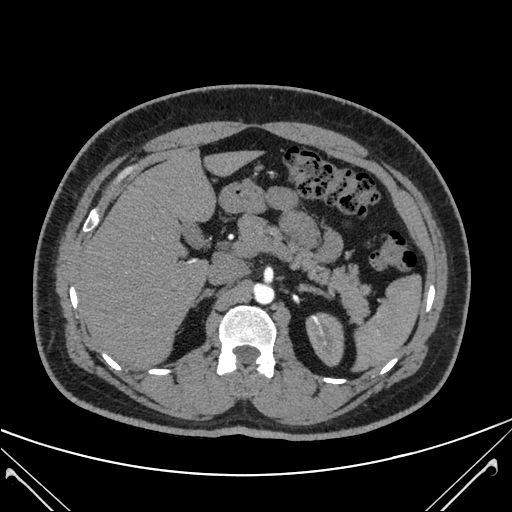

In [181]:
from IPython.display import Image

image_path = '../aojiang/06test2/ct1/ct2/Normal/Normal.jpg'
Image(filename=image_path)

In [186]:
from IPython.display import Image

image_path = '../aojiang/06test2/ct1/ct2/Normal/kidney_normal.jpg'
Image(filename=image_path)

FileNotFoundError: [Errno 2] No such file or directory: '../aojiang/06test2/ct1/ct2/Normal/kidney_tumor.jpg'

In [190]:
import cv2
from PIL import Image
import os

# 定义图像文件的路径
image_path = '../aojiang/06test2/ct1/ct2/Normal/Normal.jpg'

# 使用 OpenCV 的 imread 函数读取图像文件的路径
img = cv2.imread(str(image_path))

# 确保图像读取成功
if img is not None:
    # 从 PIL 包中导入 Image 模块
    from PIL import Image 

    # 使用 Image.open 方法创建一个 Image 对象 im1
    im1 = Image.open(image_path)

    # 定义新的文件名和保存路径
    new_image_name = "kidney_normal.jpg"
    new_image_path = os.path.join(os.path.dirname(image_path), new_image_name)

    # 保存 Image 对象 im1 到新的文件路径
    im1.save(new_image_path)
else:
    print("The image could not be read. Please check the file path.")

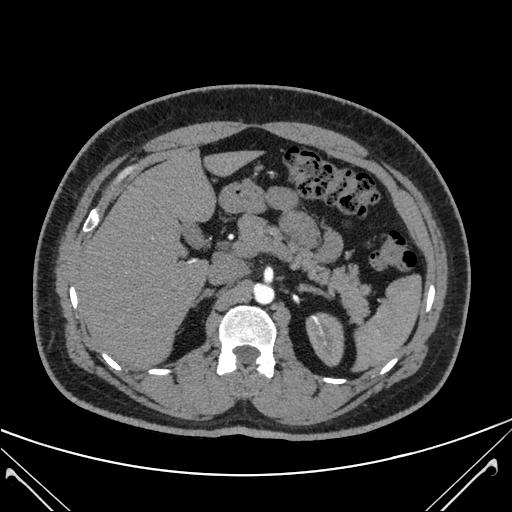

In [191]:
from IPython.display import Image

image_path = '../aojiang/06test2/ct1/ct2/Normal/kidney_normal.jpg'
Image(filename=image_path)